In [32]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Dropout, GRU
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.regularizers import l2,l1
from keras.callbacks import EarlyStopping
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
import joblib
import matplotlib.colors as mcolors


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

CNN_model_Name ='STD_MM_ModelWithPooling_Dilation_rate=7Filter_size=256Kernel_size=3_dilKernel=5Optimizer=adam.h5'
GRU_model_Name = 'STD_MM_GRU_Model.h5'
LSTM_model_Name = 'STD_MM_LSTM_Model.h5'

In [2]:
inputData = pd.read_csv("inputData.csv")
outputData = pd.read_csv("outputData.csv")


In [3]:
#Splitting the data on train and test
inputData_train, inputData_test, outputData_train, outputData_test = train_test_split(inputData, outputData, test_size=0.2)


#Scaling the data
inputScaler = StandardScaler()
outputScaler = MinMaxScaler()
inputScaler.fit(inputData_train)
outputScaler.fit(outputData_train)

scaled_inputData_train = inputScaler.transform(inputData_train)
scaled_inputData_test = inputScaler.transform(inputData_test)

scaled_outputData_train = outputScaler.transform(outputData_train)
scaled_outputData_test = outputScaler.transform(outputData_test)

print("Scaled Input Train data shape: ",scaled_inputData_train.shape)
print("Scaled Output Train data shape: ",scaled_outputData_train.shape)
print("---------------------------------------------")
print("Scaled Input Test data shape: ",scaled_inputData_test.shape)
print("Scaled Output Test data shape: ",scaled_outputData_test.shape)

Scaled Input Train data shape:  (57101, 64)
Scaled Output Train data shape:  (57101, 17)
---------------------------------------------
Scaled Input Test data shape:  (14276, 64)
Scaled Output Test data shape:  (14276, 17)


In [4]:
#Checking the shapes
inputShape = (scaled_inputData_train.shape[1],1)
outputShape = scaled_outputData_train.shape[1]
print(inputShape)
print(outputShape)
print(scaled_inputData_train.shape)
print(scaled_outputData_train.shape)

numOfEpochs = 150 #Umetnuti željeni broj epoha za trening modela
batchSize = 24 #Umetnuti željeni batch size
patineceForCallback = 20 #Ranije zaustavljanje treninga modela (koliko epoha strpljenja za isti rezultat)

print(np.min(outputData))
print("--------------------")
print(outputData.median())
print("--------------------")
print(np.max(outputData))
print("--------------------")

(64, 1)
17
(57101, 64)
(57101, 17)
Ost|NO            0.0
Ost|NO2           0.0
Ost|PM10K         0.0
West|NO           0.0
West|NO2         -0.0
West|PM10K        0.0
Nord|O3           0.0
Nord|NO           0.0
Nord|NO2         -0.0
Nord|PM10K        0.0
Sud|O3            0.0
Sud|NO           -0.0
Sud|NO2           0.4
Sud|PM10K         0.0
DonBosco|NO       0.0
DonBosco|NO2      0.0
DonBosco|PM10K    0.0
dtype: float64
--------------------
Ost|NO             7.0
Ost|NO2           23.0
Ost|PM10K         21.9
West|NO            2.0
West|NO2          21.0
West|PM10K        18.9
Nord|O3           37.0
Nord|NO            1.0
Nord|NO2          17.0
Nord|PM10K        17.2
Sud|O3            29.0
Sud|NO             5.0
Sud|NO2           23.0
Sud|PM10K         20.5
DonBosco|NO       22.0
DonBosco|NO2      36.0
DonBosco|PM10K    22.5
dtype: float64
--------------------
Ost|NO            474.000000
Ost|NO2           125.363996
Ost|PM10K         271.212187
West|NO           359.482371
West|NO2    

In [5]:
#Loading models for testing
CNN_Model = load_model(CNN_model_Name)
#CNN_Model.summary()
scaled_CNN_Prediction = CNN_Model.predict(scaled_inputData_test)
'''
LSTM_Model = load_model(LSTM_model_Name)
#LSTM_Model.summary()
scaled_LSTM_Prediction = LSTM_Model.predict(scaled_inputData_test)

GRU_Model = load_model(GRU_model_Name)
#GRU_Model.summary()
scaled_GRU_Prediction = GRU_Model.predict(scaled_inputData_test)

RFModel = joblib.load('RFModel.pkl')
scaled_RF_prediction = RFModel.predict(scaled_inputData_test)

XGBModel = XGBRegressor(n_estimators=600, subsample=0.8,min_child_weight=4, max_depth=8,learning_rate = 0.05, gamma=0,colsample_bytree =0.9)
XGBModel.fit(scaled_inputData_train, scaled_outputData_train)
scaled_XGB_prediction = XGBModel.predict(scaled_inputData_test)
'''

447/447 [==============================] - 12s 25ms/step


INVERSE SCALED (ORIGINAL) DATA


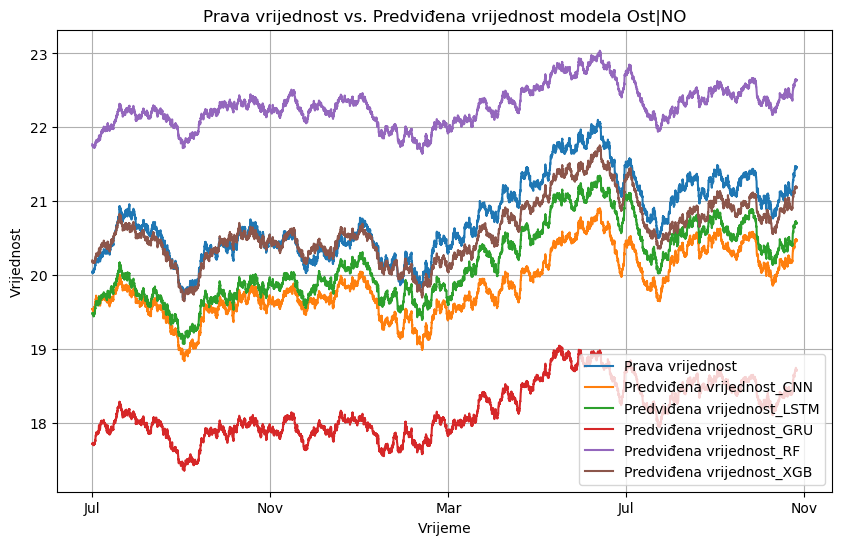

R-squared (R2) CNN Model Score for Ost|NO: 0.8909
R-squared (R2) LSTM Model Score for Ost|NO: 0.8795
R-squared (R2) GRU Model Score for Ost|NO: 0.7972
R-squared (R2) RF Model Score for Ost|NO: 0.8046
R-squared (R2) XGB Model Score for Ost|NO: 0.8402
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Ost|NO: 6.3504
Mean Absolute Error (MAE) LSTM Model Score for Ost|NO: 6.7647
Mean Absolute Error (MAE) GRU Model Score for Ost|NO: 8.5088
Mean Absolute Error (MAE) RF Model Score for Ost|NO: 8.6977
Mean Absolute Error (MAE) XGB Model Score for Ost|NO: 7.5519
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Ost|NO for CNN: 42.4590
MdAPE (Median Absolute Percentage Error) of Ost|NO for LSTM: 44.5184
MdAPE (Median Absolute Percentage Error) of Ost|NO for GRU: 52.5056
MdAPE (Median Absolute Percentage Error) of Ost|NO for RF: 55.9926
MdAPE (Median Absolute Percentage Error) of Ost|NO for XGB:

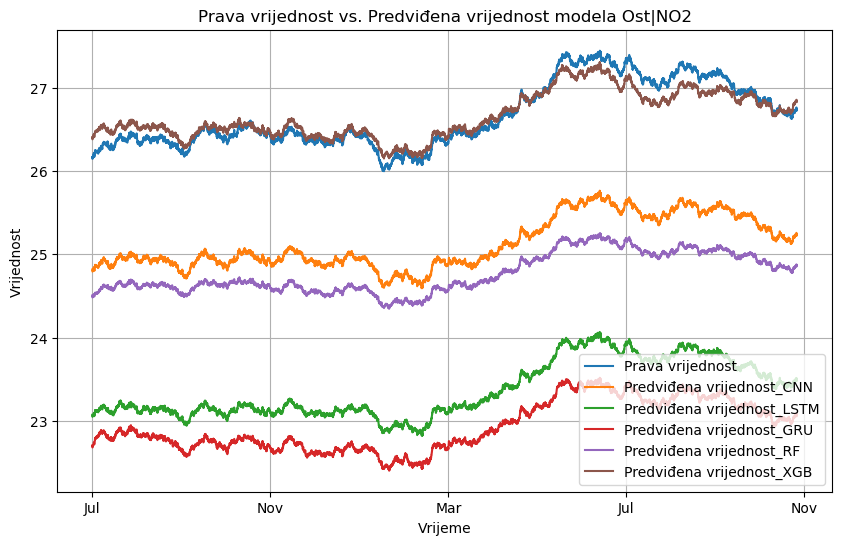

R-squared (R2) CNN Model Score for Ost|NO2: 0.8955
R-squared (R2) LSTM Model Score for Ost|NO2: 0.8369
R-squared (R2) GRU Model Score for Ost|NO2: 0.7642
R-squared (R2) RF Model Score for Ost|NO2: 0.7889
R-squared (R2) XGB Model Score for Ost|NO2: 0.8518
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Ost|NO2: 3.7809
Mean Absolute Error (MAE) LSTM Model Score for Ost|NO2: 4.9587
Mean Absolute Error (MAE) GRU Model Score for Ost|NO2: 5.9504
Mean Absolute Error (MAE) RF Model Score for Ost|NO2: 5.5309
Mean Absolute Error (MAE) XGB Model Score for Ost|NO2: 4.7042
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Ost|NO2 for CNN: 12.1543
MdAPE (Median Absolute Percentage Error) of Ost|NO2 for LSTM: 17.0877
MdAPE (Median Absolute Percentage Error) of Ost|NO2 for GRU: 20.9564
MdAPE (Median Absolute Percentage Error) of Ost|NO2 for RF: 18.0283
MdAPE (Median Absolute Percentage Error) of O

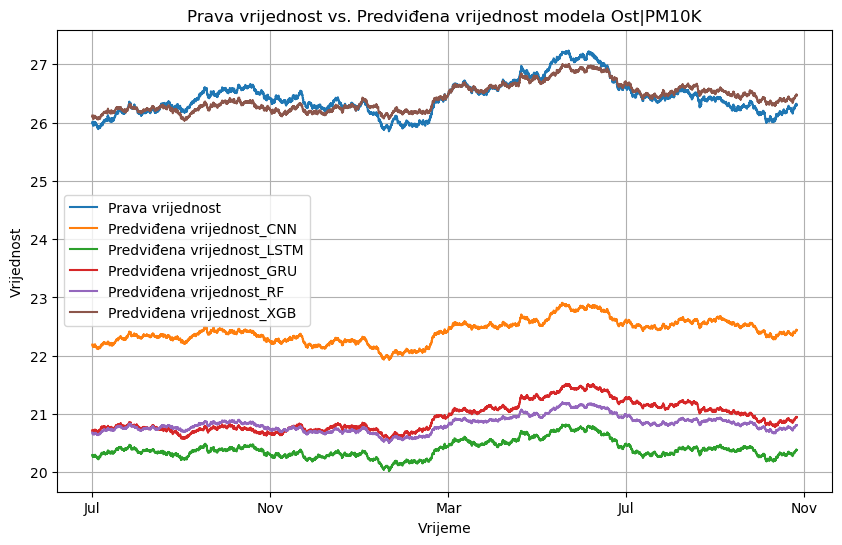

R-squared (R2) CNN Model Score for Ost|PM10K: 0.7520
R-squared (R2) LSTM Model Score for Ost|PM10K: 0.6568
R-squared (R2) GRU Model Score for Ost|PM10K: 0.5710
R-squared (R2) RF Model Score for Ost|PM10K: 0.5676
R-squared (R2) XGB Model Score for Ost|PM10K: 0.8196
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Ost|PM10K: 6.1140
Mean Absolute Error (MAE) LSTM Model Score for Ost|PM10K: 7.4130
Mean Absolute Error (MAE) GRU Model Score for Ost|PM10K: 7.8873
Mean Absolute Error (MAE) RF Model Score for Ost|PM10K: 7.5058
Mean Absolute Error (MAE) XGB Model Score for Ost|PM10K: 5.2444
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Ost|PM10K for CNN: 19.7040
MdAPE (Median Absolute Percentage Error) of Ost|PM10K for LSTM: 24.8544
MdAPE (Median Absolute Percentage Error) of Ost|PM10K for GRU: 25.6321
MdAPE (Median Absolute Percentage Error) of Ost|PM10K for RF: 22.8814
MdAPE (Median Abs

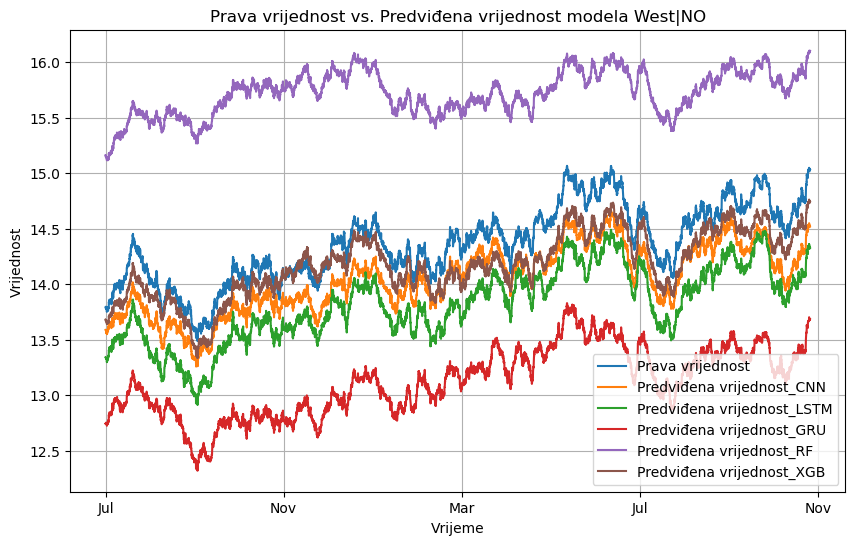

R-squared (R2) CNN Model Score for West|NO: 0.9042
R-squared (R2) LSTM Model Score for West|NO: 0.8945
R-squared (R2) GRU Model Score for West|NO: 0.8192
R-squared (R2) RF Model Score for West|NO: 0.8029
R-squared (R2) XGB Model Score for West|NO: 0.8533
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for West|NO: 4.5650
Mean Absolute Error (MAE) LSTM Model Score for West|NO: 4.7918
Mean Absolute Error (MAE) GRU Model Score for West|NO: 6.3629
Mean Absolute Error (MAE) RF Model Score for West|NO: 6.9558
Mean Absolute Error (MAE) XGB Model Score for West|NO: 5.6572
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of West|NO for CNN: 66.7459
MdAPE (Median Absolute Percentage Error) of West|NO for LSTM: 68.8503
MdAPE (Median Absolute Percentage Error) of West|NO for GRU: 87.9662
MdAPE (Median Absolute Percentage Error) of West|NO for RF: 101.6780
MdAPE (Median Absolute Percentage Error) of 

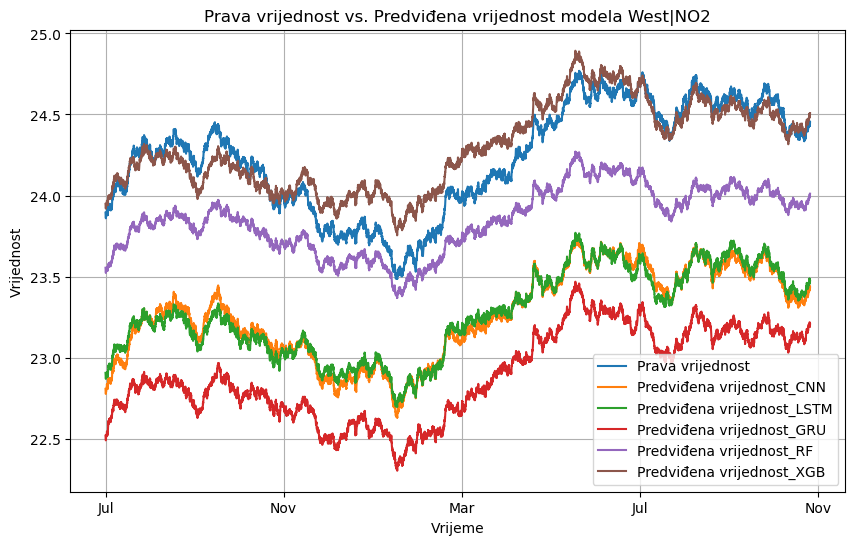

R-squared (R2) CNN Model Score for West|NO2: 0.9163
R-squared (R2) LSTM Model Score for West|NO2: 0.8992
R-squared (R2) GRU Model Score for West|NO2: 0.8304
R-squared (R2) RF Model Score for West|NO2: 0.8364
R-squared (R2) XGB Model Score for West|NO2: 0.8563
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for West|NO2: 3.1726
Mean Absolute Error (MAE) LSTM Model Score for West|NO2: 3.6065
Mean Absolute Error (MAE) GRU Model Score for West|NO2: 4.7864
Mean Absolute Error (MAE) RF Model Score for West|NO2: 4.7457
Mean Absolute Error (MAE) XGB Model Score for West|NO2: 4.4189
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of West|NO2 for CNN: 11.3270
MdAPE (Median Absolute Percentage Error) of West|NO2 for LSTM: 13.3545
MdAPE (Median Absolute Percentage Error) of West|NO2 for GRU: 18.0605
MdAPE (Median Absolute Percentage Error) of West|NO2 for RF: 16.7426
MdAPE (Median Absolute Percenta

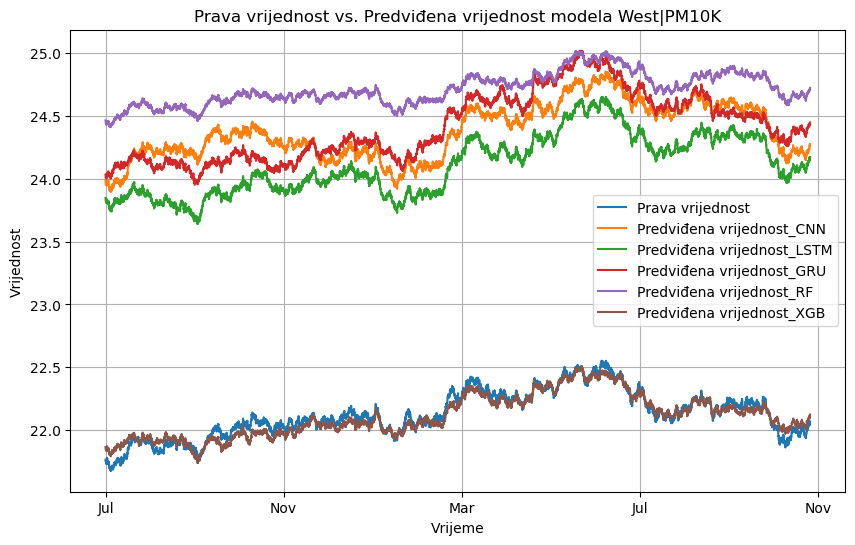

R-squared (R2) CNN Model Score for West|PM10K: 0.8233
R-squared (R2) LSTM Model Score for West|PM10K: 0.8042
R-squared (R2) GRU Model Score for West|PM10K: 0.6797
R-squared (R2) RF Model Score for West|PM10K: 0.7543
R-squared (R2) XGB Model Score for West|PM10K: 0.8404
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for West|PM10K: 4.4351
Mean Absolute Error (MAE) LSTM Model Score for West|PM10K: 4.7609
Mean Absolute Error (MAE) GRU Model Score for West|PM10K: 6.1269
Mean Absolute Error (MAE) RF Model Score for West|PM10K: 5.4433
Mean Absolute Error (MAE) XGB Model Score for West|PM10K: 4.1506
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of West|PM10K for CNN: 17.5146
MdAPE (Median Absolute Percentage Error) of West|PM10K for LSTM: 19.1226
MdAPE (Median Absolute Percentage Error) of West|PM10K for GRU: 24.5704
MdAPE (Median Absolute Percentage Error) of West|PM10K for RF: 22.7217
MdA

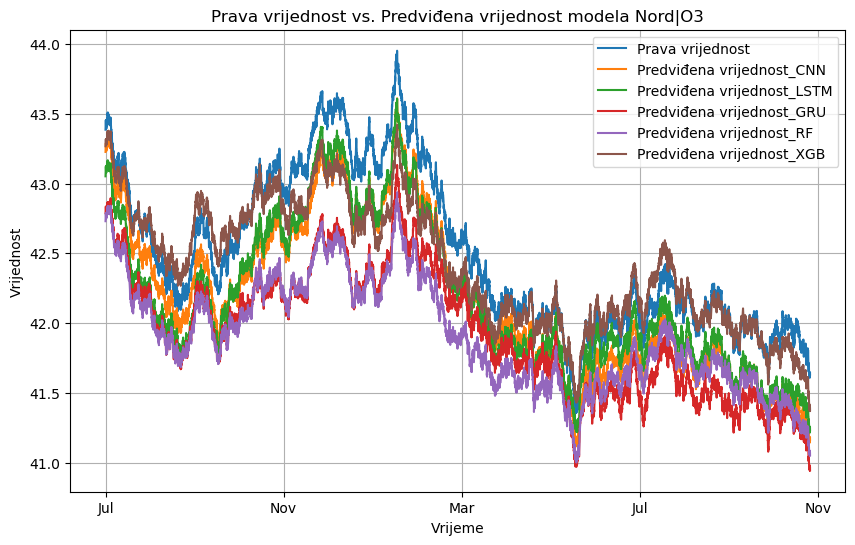

R-squared (R2) CNN Model Score for Nord|O3: 0.9552
R-squared (R2) LSTM Model Score for Nord|O3: 0.9438
R-squared (R2) GRU Model Score for Nord|O3: 0.9020
R-squared (R2) RF Model Score for Nord|O3: 0.9309
R-squared (R2) XGB Model Score for Nord|O3: 0.9246
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Nord|O3: 4.8522
Mean Absolute Error (MAE) LSTM Model Score for Nord|O3: 5.7185
Mean Absolute Error (MAE) GRU Model Score for Nord|O3: 7.9236
Mean Absolute Error (MAE) RF Model Score for Nord|O3: 6.8599
Mean Absolute Error (MAE) XGB Model Score for Nord|O3: 6.8900
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Nord|O3 for CNN: 11.1930
MdAPE (Median Absolute Percentage Error) of Nord|O3 for LSTM: 14.2786
MdAPE (Median Absolute Percentage Error) of Nord|O3 for GRU: 20.2148
MdAPE (Median Absolute Percentage Error) of Nord|O3 for RF: 15.9169
MdAPE (Median Absolute Percentage Error) of N

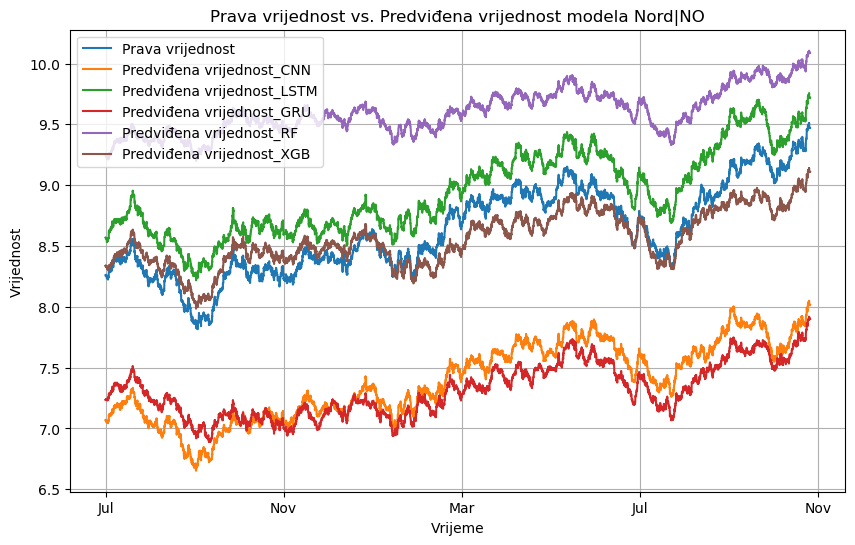

R-squared (R2) CNN Model Score for Nord|NO: 0.8804
R-squared (R2) LSTM Model Score for Nord|NO: 0.8636
R-squared (R2) GRU Model Score for Nord|NO: 0.7510
R-squared (R2) RF Model Score for Nord|NO: 0.7690
R-squared (R2) XGB Model Score for Nord|NO: 0.8068
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Nord|NO: 3.4106
Mean Absolute Error (MAE) LSTM Model Score for Nord|NO: 3.5394
Mean Absolute Error (MAE) GRU Model Score for Nord|NO: 4.8898
Mean Absolute Error (MAE) RF Model Score for Nord|NO: 4.8598
Mean Absolute Error (MAE) XGB Model Score for Nord|NO: 4.1144
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Nord|NO for CNN: 131.6271
MdAPE (Median Absolute Percentage Error) of Nord|NO for LSTM: 89.5914
MdAPE (Median Absolute Percentage Error) of Nord|NO for GRU: 140.9976
MdAPE (Median Absolute Percentage Error) of Nord|NO for RF: 190.9933
MdAPE (Median Absolute Percentage Error) o

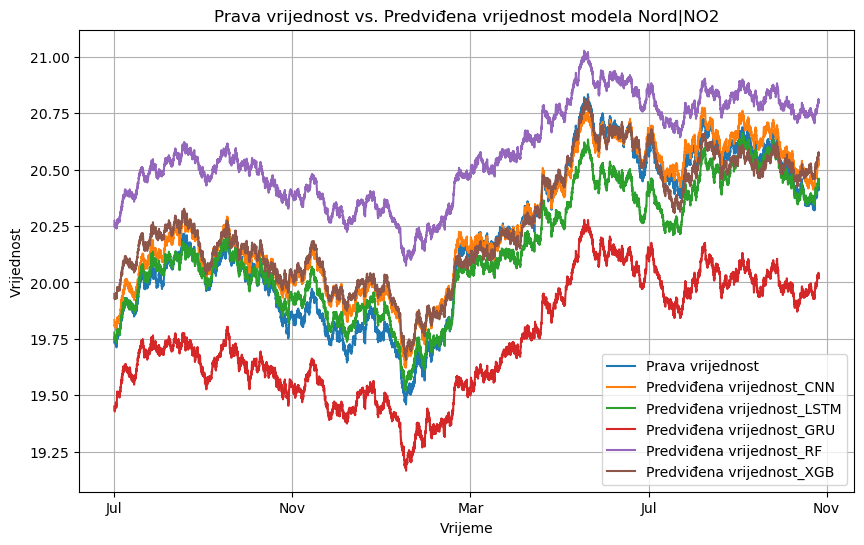

R-squared (R2) CNN Model Score for Nord|NO2: 0.9215
R-squared (R2) LSTM Model Score for Nord|NO2: 0.8952
R-squared (R2) GRU Model Score for Nord|NO2: 0.8236
R-squared (R2) RF Model Score for Nord|NO2: 0.8432
R-squared (R2) XGB Model Score for Nord|NO2: 0.8401
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Nord|NO2: 2.6809
Mean Absolute Error (MAE) LSTM Model Score for Nord|NO2: 3.3016
Mean Absolute Error (MAE) GRU Model Score for Nord|NO2: 4.3934
Mean Absolute Error (MAE) RF Model Score for Nord|NO2: 4.1936
Mean Absolute Error (MAE) XGB Model Score for Nord|NO2: 4.1650
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Nord|NO2 for CNN: 11.6481
MdAPE (Median Absolute Percentage Error) of Nord|NO2 for LSTM: 15.2418
MdAPE (Median Absolute Percentage Error) of Nord|NO2 for GRU: 20.9320
MdAPE (Median Absolute Percentage Error) of Nord|NO2 for RF: 19.1750
MdAPE (Median Absolute Percenta

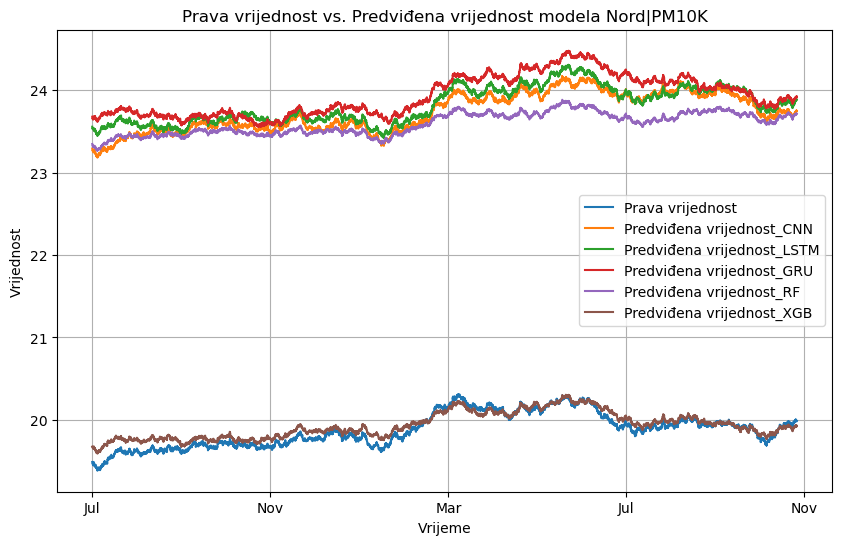

R-squared (R2) CNN Model Score for Nord|PM10K: 0.7181
R-squared (R2) LSTM Model Score for Nord|PM10K: 0.6728
R-squared (R2) GRU Model Score for Nord|PM10K: 0.5557
R-squared (R2) RF Model Score for Nord|PM10K: 0.7040
R-squared (R2) XGB Model Score for Nord|PM10K: 0.8394
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Nord|PM10K: 5.1702
Mean Absolute Error (MAE) LSTM Model Score for Nord|PM10K: 5.5339
Mean Absolute Error (MAE) GRU Model Score for Nord|PM10K: 6.4661
Mean Absolute Error (MAE) RF Model Score for Nord|PM10K: 5.4895
Mean Absolute Error (MAE) XGB Model Score for Nord|PM10K: 3.6322
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Nord|PM10K for CNN: 23.8961
MdAPE (Median Absolute Percentage Error) of Nord|PM10K for LSTM: 25.0385
MdAPE (Median Absolute Percentage Error) of Nord|PM10K for GRU: 28.9979
MdAPE (Median Absolute Percentage Error) of Nord|PM10K for RF: 28.2149
MdA

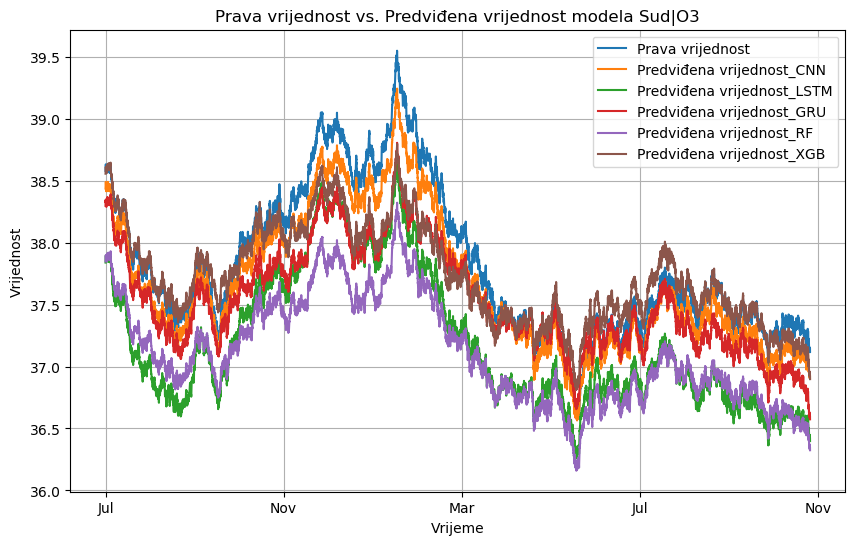

R-squared (R2) CNN Model Score for Sud|O3: 0.9592
R-squared (R2) LSTM Model Score for Sud|O3: 0.9492
R-squared (R2) GRU Model Score for Sud|O3: 0.9157
R-squared (R2) RF Model Score for Sud|O3: 0.9380
R-squared (R2) XGB Model Score for Sud|O3: 0.9308
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Sud|O3: 4.6078
Mean Absolute Error (MAE) LSTM Model Score for Sud|O3: 5.3876
Mean Absolute Error (MAE) GRU Model Score for Sud|O3: 7.2677
Mean Absolute Error (MAE) RF Model Score for Sud|O3: 6.5522
Mean Absolute Error (MAE) XGB Model Score for Sud|O3: 6.5795
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Sud|O3 for CNN: 14.1608
MdAPE (Median Absolute Percentage Error) of Sud|O3 for LSTM: 17.3731
MdAPE (Median Absolute Percentage Error) of Sud|O3 for GRU: 24.0798
MdAPE (Median Absolute Percentage Error) of Sud|O3 for RF: 21.1739
MdAPE (Median Absolute Percentage Error) of Sud|O3 for XGB:

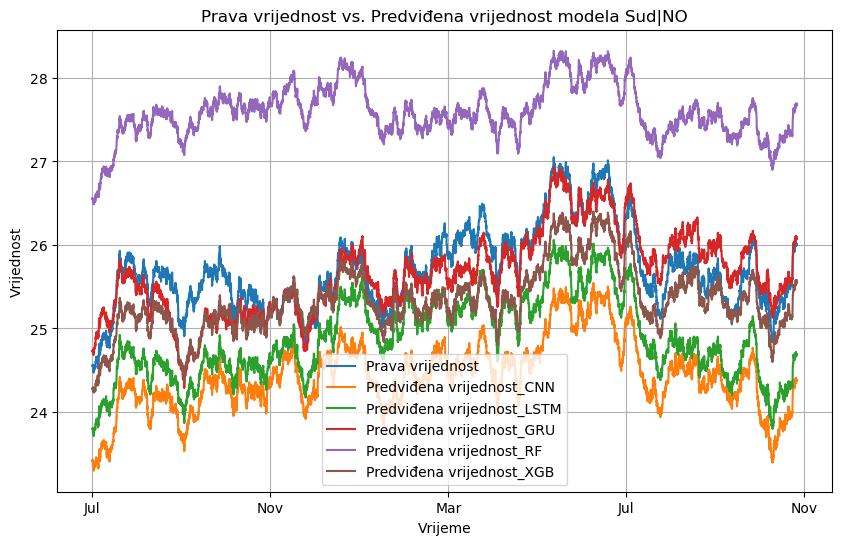

R-squared (R2) CNN Model Score for Sud|NO: 0.9154
R-squared (R2) LSTM Model Score for Sud|NO: 0.8976
R-squared (R2) GRU Model Score for Sud|NO: 0.8262
R-squared (R2) RF Model Score for Sud|NO: 0.8117
R-squared (R2) XGB Model Score for Sud|NO: 0.8487
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Sud|NO: 7.1934
Mean Absolute Error (MAE) LSTM Model Score for Sud|NO: 7.8801
Mean Absolute Error (MAE) GRU Model Score for Sud|NO: 10.7857
Mean Absolute Error (MAE) RF Model Score for Sud|NO: 11.6484
Mean Absolute Error (MAE) XGB Model Score for Sud|NO: 9.8564
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Sud|NO for CNN: 58.2515
MdAPE (Median Absolute Percentage Error) of Sud|NO for LSTM: 47.6496
MdAPE (Median Absolute Percentage Error) of Sud|NO for GRU: 66.8713
MdAPE (Median Absolute Percentage Error) of Sud|NO for RF: 70.6231
MdAPE (Median Absolute Percentage Error) of Sud|NO for XG

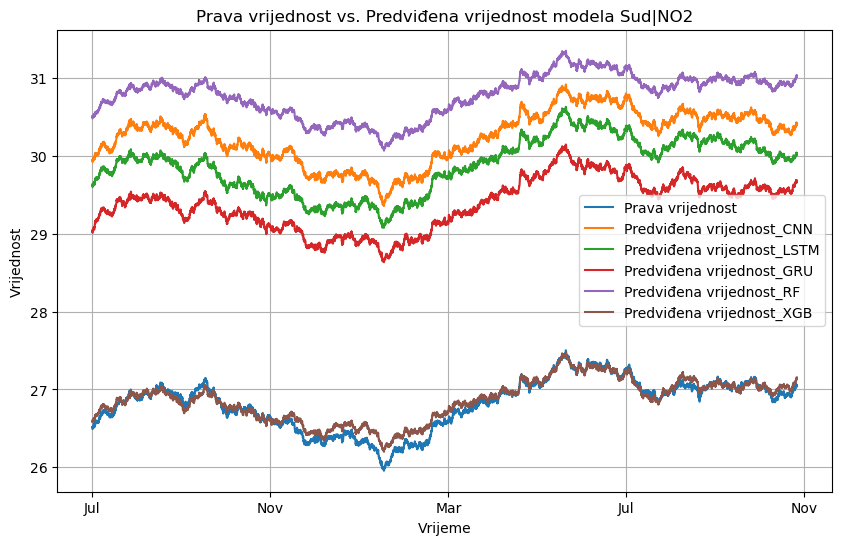

R-squared (R2) CNN Model Score for Sud|NO2: 0.8718
R-squared (R2) LSTM Model Score for Sud|NO2: 0.8612
R-squared (R2) GRU Model Score for Sud|NO2: 0.8174
R-squared (R2) RF Model Score for Sud|NO2: 0.8234
R-squared (R2) XGB Model Score for Sud|NO2: 0.8573
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Sud|NO2: 4.6315
Mean Absolute Error (MAE) LSTM Model Score for Sud|NO2: 4.8061
Mean Absolute Error (MAE) GRU Model Score for Sud|NO2: 5.5526
Mean Absolute Error (MAE) RF Model Score for Sud|NO2: 5.7487
Mean Absolute Error (MAE) XGB Model Score for Sud|NO2: 4.7779
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Sud|NO2 for CNN: 16.0952
MdAPE (Median Absolute Percentage Error) of Sud|NO2 for LSTM: 16.6809
MdAPE (Median Absolute Percentage Error) of Sud|NO2 for GRU: 18.8606
MdAPE (Median Absolute Percentage Error) of Sud|NO2 for RF: 21.2219
MdAPE (Median Absolute Percentage Error) of S

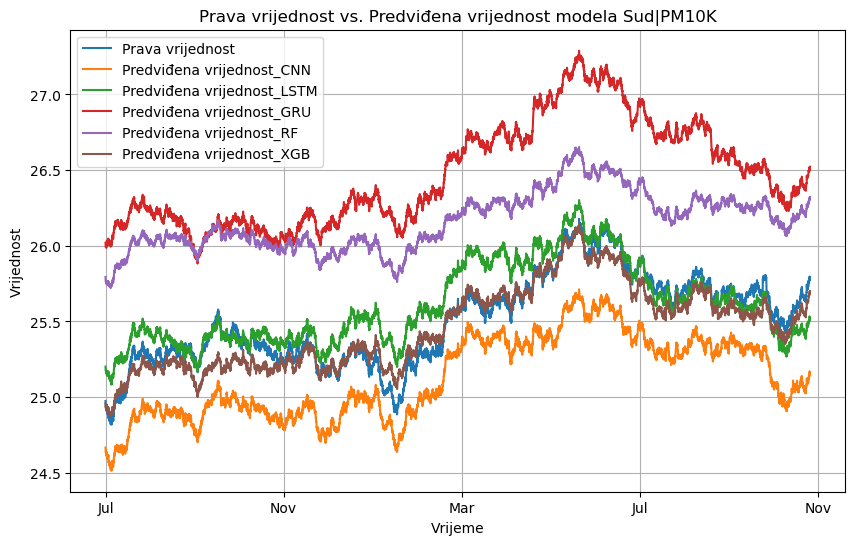

R-squared (R2) CNN Model Score for Sud|PM10K: 0.8669
R-squared (R2) LSTM Model Score for Sud|PM10K: 0.8538
R-squared (R2) GRU Model Score for Sud|PM10K: 0.7566
R-squared (R2) RF Model Score for Sud|PM10K: 0.7829
R-squared (R2) XGB Model Score for Sud|PM10K: 0.8429
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for Sud|PM10K: 4.4756
Mean Absolute Error (MAE) LSTM Model Score for Sud|PM10K: 4.9295
Mean Absolute Error (MAE) GRU Model Score for Sud|PM10K: 6.5242
Mean Absolute Error (MAE) RF Model Score for Sud|PM10K: 5.9212
Mean Absolute Error (MAE) XGB Model Score for Sud|PM10K: 5.0994
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of Sud|PM10K for CNN: 14.9383
MdAPE (Median Absolute Percentage Error) of Sud|PM10K for LSTM: 17.2619
MdAPE (Median Absolute Percentage Error) of Sud|PM10K for GRU: 22.5351
MdAPE (Median Absolute Percentage Error) of Sud|PM10K for RF: 19.5753
MdAPE (Median Abs

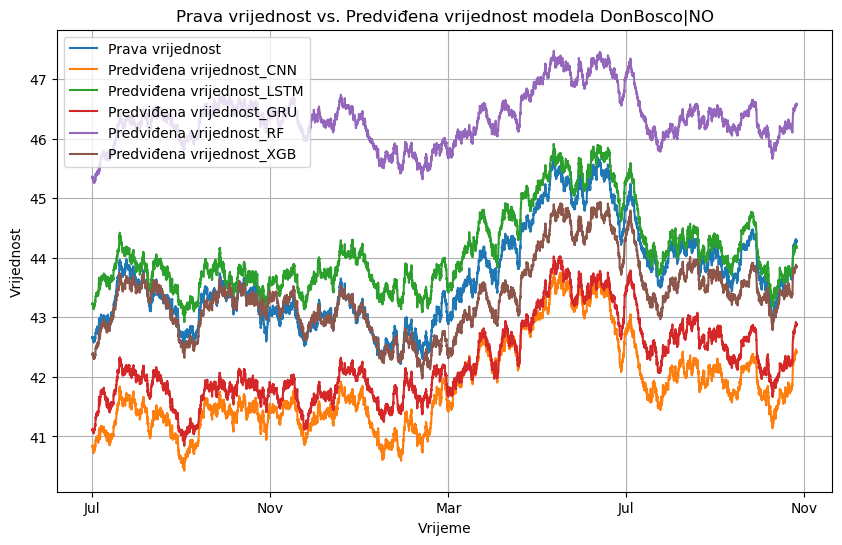

R-squared (R2) CNN Model Score for DonBosco|NO: 0.9091
R-squared (R2) LSTM Model Score for DonBosco|NO: 0.9009
R-squared (R2) GRU Model Score for DonBosco|NO: 0.8433
R-squared (R2) RF Model Score for DonBosco|NO: 0.8218
R-squared (R2) XGB Model Score for DonBosco|NO: 0.8570
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for DonBosco|NO: 10.6392
Mean Absolute Error (MAE) LSTM Model Score for DonBosco|NO: 11.1807
Mean Absolute Error (MAE) GRU Model Score for DonBosco|NO: 13.9924
Mean Absolute Error (MAE) RF Model Score for DonBosco|NO: 14.9188
Mean Absolute Error (MAE) XGB Model Score for DonBosco|NO: 13.0126
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of DonBosco|NO for CNN: 29.5201
MdAPE (Median Absolute Percentage Error) of DonBosco|NO for LSTM: 29.0986
MdAPE (Median Absolute Percentage Error) of DonBosco|NO for GRU: 36.0391
MdAPE (Median Absolute Percentage Error) of DonBosco|NO 

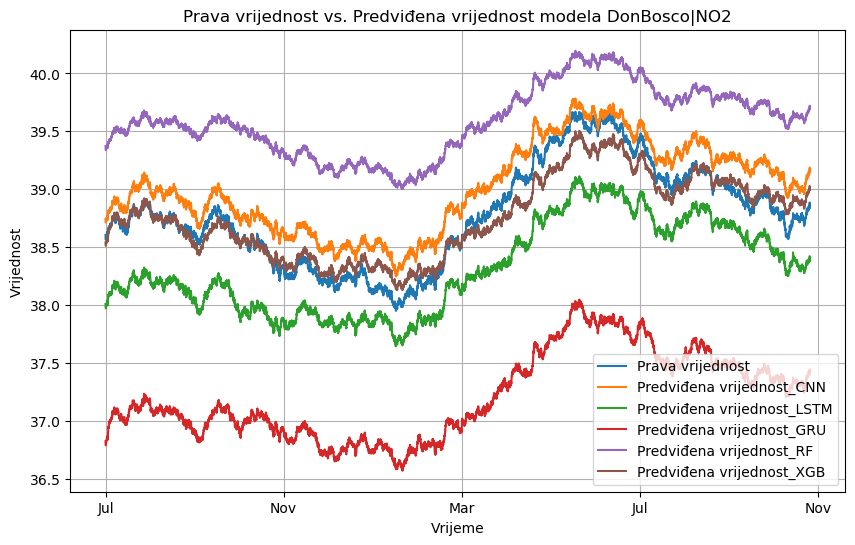

R-squared (R2) CNN Model Score for DonBosco|NO2: 0.9062
R-squared (R2) LSTM Model Score for DonBosco|NO2: 0.8787
R-squared (R2) GRU Model Score for DonBosco|NO2: 0.8059
R-squared (R2) RF Model Score for DonBosco|NO2: 0.8165
R-squared (R2) XGB Model Score for DonBosco|NO2: 0.8419
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for DonBosco|NO2: 4.0636
Mean Absolute Error (MAE) LSTM Model Score for DonBosco|NO2: 4.8130
Mean Absolute Error (MAE) GRU Model Score for DonBosco|NO2: 6.2195
Mean Absolute Error (MAE) RF Model Score for DonBosco|NO2: 6.1043
Mean Absolute Error (MAE) XGB Model Score for DonBosco|NO2: 5.5701
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of DonBosco|NO2 for CNN: 8.5027
MdAPE (Median Absolute Percentage Error) of DonBosco|NO2 for LSTM: 10.5440
MdAPE (Median Absolute Percentage Error) of DonBosco|NO2 for GRU: 14.1749
MdAPE (Median Absolute Percentage Error) of DonBo

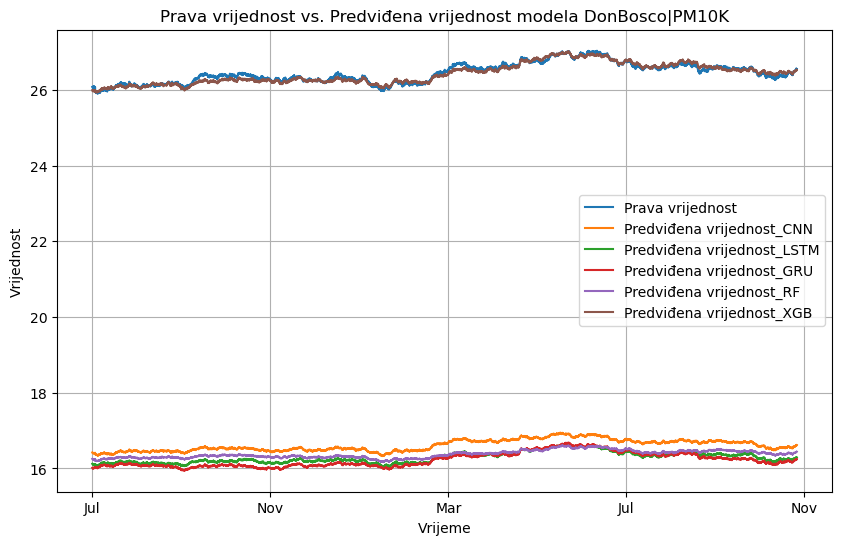

R-squared (R2) CNN Model Score for DonBosco|PM10K: 0.3450
R-squared (R2) LSTM Model Score for DonBosco|PM10K: 0.3215
R-squared (R2) GRU Model Score for DonBosco|PM10K: 0.2382
R-squared (R2) RF Model Score for DonBosco|PM10K: 0.2126
R-squared (R2) XGB Model Score for DonBosco|PM10K: 0.8109
--------------------------------------------------------
Mean Absolute Error (MAE) CNN Model Score for DonBosco|PM10K: 10.2556
Mean Absolute Error (MAE) LSTM Model Score for DonBosco|PM10K: 10.5593
Mean Absolute Error (MAE) GRU Model Score for DonBosco|PM10K: 10.8822
Mean Absolute Error (MAE) RF Model Score for DonBosco|PM10K: 10.6778
Mean Absolute Error (MAE) XGB Model Score for DonBosco|PM10K: 5.0469
--------------------------------------------------------
MdAPE (Median Absolute Percentage Error) of DonBosco|PM10K for CNN: 36.3900
MdAPE (Median Absolute Percentage Error) of DonBosco|PM10K for LSTM: 38.1057
MdAPE (Median Absolute Percentage Error) of DonBosco|PM10K for GRU: 38.6082
MdAPE (Median Abso

In [27]:
def MdAPE(actual, predicted):
    absolute_errors = np.abs(predicted - actual)
    percentage_errors = np.divide(absolute_errors, actual) * 100
    md_ape = np.median(percentage_errors)
    return md_ape

inverseScaled_outputData_test = outputScaler.inverse_transform(scaled_outputData_test)
inverseScaled_predicted_outputData_CNN = outputScaler.inverse_transform(scaled_CNN_Prediction)
inverseScaled_predicted_outputData_LSTM = outputScaler.inverse_transform(scaled_LSTM_Prediction)
inverseScaled_predicted_outputData_GRU = outputScaler.inverse_transform(scaled_GRU_Prediction)
inverseScaled_predicted_outputData_RF = outputScaler.inverse_transform(scaled_RF_prediction)
inverseScaled_predicted_outputData_XGB = outputScaler.inverse_transform(scaled_XGB_prediction)

windowSize = 2880 # 24-dan, 168-tjedan, 720-mjesec, 1440-dva mj, 2160-tri mj, 2880-cetiri mj
custom_xticks = [0, windowSize, windowSize*2, windowSize*3, windowSize*4]
threeMonths = ['Jul', 'Oct', 'Jan', 'Apr', 'Jul', 'Oct', 'Jan']
fourMonths = ['Jul','Nov','Mar','Jul','Nov']
print("===============================================================================")
print("INVERSE SCALED (ORIGINAL) DATA")
print("===============================================================================")
i=0

MdAPE_CNN = []
MdAPE_LSTM = []
MdAPE_GRU = []
MdAPE_RF = []
MdAPE_XGB = []

for var in outputData.columns:
    movingAverage_OutputData_Test = np.convolve(inverseScaled_outputData_test[:,i],np.ones(windowSize)/windowSize, mode='valid')
    movingAverage_OutputData_Predicted_CNN = np.convolve(inverseScaled_predicted_outputData_CNN[:,i],np.ones(windowSize)/windowSize, mode='valid')
    movingAverage_OutputData_Predicted_LSTM = np.convolve(inverseScaled_predicted_outputData_LSTM[:,i],np.ones(windowSize)/windowSize, mode='valid')
    movingAverage_OutputData_Predicted_GRU = np.convolve(inverseScaled_predicted_outputData_GRU[:,i],np.ones(windowSize)/windowSize, mode='valid')
    movingAverage_OutputData_Predicted_RF = np.convolve(inverseScaled_predicted_outputData_RF[:,i],np.ones(windowSize)/windowSize, mode='valid')
    movingAverage_OutputData_Predicted_XGB = np.convolve(inverseScaled_predicted_outputData_XGB[:,i],np.ones(windowSize)/windowSize, mode='valid')
    
    plt.figure(figsize=(10,6))
    plt.plot(movingAverage_OutputData_Test, label ='Prava vrijednost')
    plt.plot(movingAverage_OutputData_Predicted_CNN, label='Predviđena vrijednost_CNN')
    plt.plot(movingAverage_OutputData_Predicted_LSTM, label='Predviđena vrijednost_LSTM')
    plt.plot(movingAverage_OutputData_Predicted_GRU, label='Predviđena vrijednost_GRU')
    plt.plot(movingAverage_OutputData_Predicted_RF, label='Predviđena vrijednost_RF')
    plt.plot(movingAverage_OutputData_Predicted_XGB, label='Predviđena vrijednost_XGB')
    plt.grid(True)
    plt.xticks(custom_xticks, fourMonths)
    plt.xlabel('Vrijeme')
    plt.ylabel('Vrijednost')
    plt.title(f'Prava vrijednost vs. Predviđena vrijednost modela {var}')
    plt.legend()
    plt.show()
    
    r2_CNN = r2_score(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_CNN[:,i])
    r2_LSTM = r2_score(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_LSTM[:,i])
    r2_GRU = r2_score(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_GRU[:,i])
    r2_RF = r2_score(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_RF[:,i])
    r2_XGB = r2_score(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_XGB[:,i])
    print(f"R-squared (R2) CNN Model Score for {var}: {r2_CNN:.4f}")
    print(f"R-squared (R2) LSTM Model Score for {var}: {r2_LSTM:.4f}")
    print(f"R-squared (R2) GRU Model Score for {var}: {r2_GRU:.4f}")
    print(f"R-squared (R2) RF Model Score for {var}: {r2_RF:.4f}")
    print(f"R-squared (R2) XGB Model Score for {var}: {r2_XGB:.4f}")
    print("--------------------------------------------------------")
    
    mae_CNN = mean_absolute_error(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_CNN[:,i])
    mae_LSTM = mean_absolute_error(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_LSTM[:,i])
    mae_GRU = mean_absolute_error(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_GRU[:,i])
    mae_RF = mean_absolute_error(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_RF[:,i])
    mae_XGB = mean_absolute_error(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_XGB[:,i])
    print(f"Mean Absolute Error (MAE) CNN Model Score for {var}: {mae_CNN:.4f}")
    print(f"Mean Absolute Error (MAE) LSTM Model Score for {var}: {mae_LSTM:.4f}")
    print(f"Mean Absolute Error (MAE) GRU Model Score for {var}: {mae_GRU:.4f}")
    print(f"Mean Absolute Error (MAE) RF Model Score for {var}: {mae_RF:.4f}")
    print(f"Mean Absolute Error (MAE) XGB Model Score for {var}: {mae_XGB:.4f}")
    print("--------------------------------------------------------")
    
    trueMedianCNN = np.median(inverseScaled_predicted_outputData_CNN[:,i])
    trueMedianTest = np.median(inverseScaled_outputData_test[:,i])
    trueMaxCNN = np.max(inverseScaled_predicted_outputData_CNN[:,i])
    trueMaxTest = np.max(inverseScaled_outputData_test[:,i])
    trueMinCNN = np.min(inverseScaled_predicted_outputData_CNN[:,i])
    trueMinTest = np.min(inverseScaled_outputData_test[:,i])
    #print(f"True Median CNN for {var}: {trueMedianCNN:.4f}")
    #print(f"True Max CNN for {var}: {trueMaxCNN:.4f}")
    #print(f"True Min CNN for {var}: {trueMinCNN:.4f}")
    #print(f"True Median TEST for {var}: {trueMedianTest:.4f}")
    #print(f"True Max TEST for {var}: {trueMaxTest:.4f}")
    #print(f"True Min TEST for {var}: {trueMinTest:.4f}")
    #print("--------------------------------------------------------")
    
    mdAPE_CNN = MdAPE(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_CNN[:,i])
    mdAPE_LSTM = MdAPE(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_LSTM[:,i])
    mdAPE_GRU = MdAPE(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_GRU[:,i])
    mdAPE_RF = MdAPE(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_RF[:,i])
    mdAPE_XGB = MdAPE(inverseScaled_outputData_test[:,i],inverseScaled_predicted_outputData_XGB[:,i])
    print(f"MdAPE (Median Absolute Percentage Error) of {var} for CNN: {mdAPE_CNN:.4f}")
    print(f"MdAPE (Median Absolute Percentage Error) of {var} for LSTM: {mdAPE_LSTM:.4f}")
    print(f"MdAPE (Median Absolute Percentage Error) of {var} for GRU: {mdAPE_GRU:.4f}")
    print(f"MdAPE (Median Absolute Percentage Error) of {var} for RF: {mdAPE_RF:.4f}")
    print(f"MdAPE (Median Absolute Percentage Error) of {var} for XGB: {mdAPE_XGB:.4f}")
    print("==============================================================================")
    
    MdAPE_CNN.append(mdAPE_CNN)
    MdAPE_LSTM.append(mdAPE_LSTM)
    MdAPE_GRU.append(mdAPE_GRU)
    MdAPE_RF.append(mdAPE_RF)
    MdAPE_XGB.append(mdAPE_XGB)    
    i+=1



<Figure size 1500x1000 with 0 Axes>

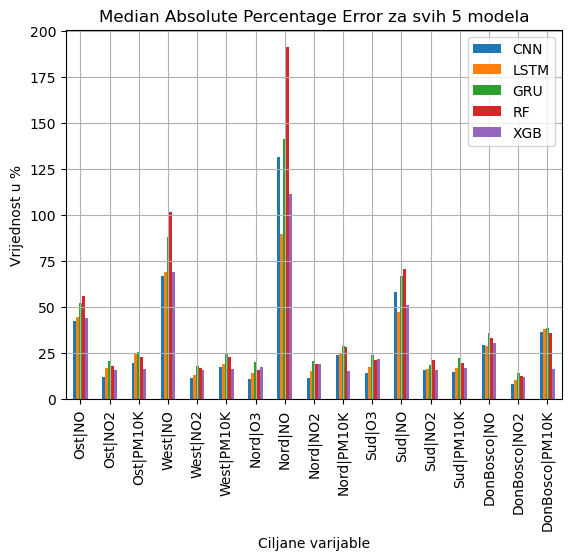

In [29]:
MdAPE_DataFrame = pd.DataFrame({
    "CNN": MdAPE_CNN,
    "LSTM": MdAPE_LSTM,
    "GRU": MdAPE_GRU,
    "RF": MdAPE_RF,
    "XGB": MdAPE_XGB
})

plt.figure(figsize=(15,10))
MdAPE_DataFrame.plot(kind="bar")
plt.title("Median Absolute Percentage Error za svih 5 modela")
plt.ylabel('Vrijednost u %')
plt.xlabel('Ciljane varijable')
xtick_Locations = range(17)
plt.xticks(xtick_Locations, outputData.columns, rotation=90)
plt.grid(True)
plt.legend()
plt.show()


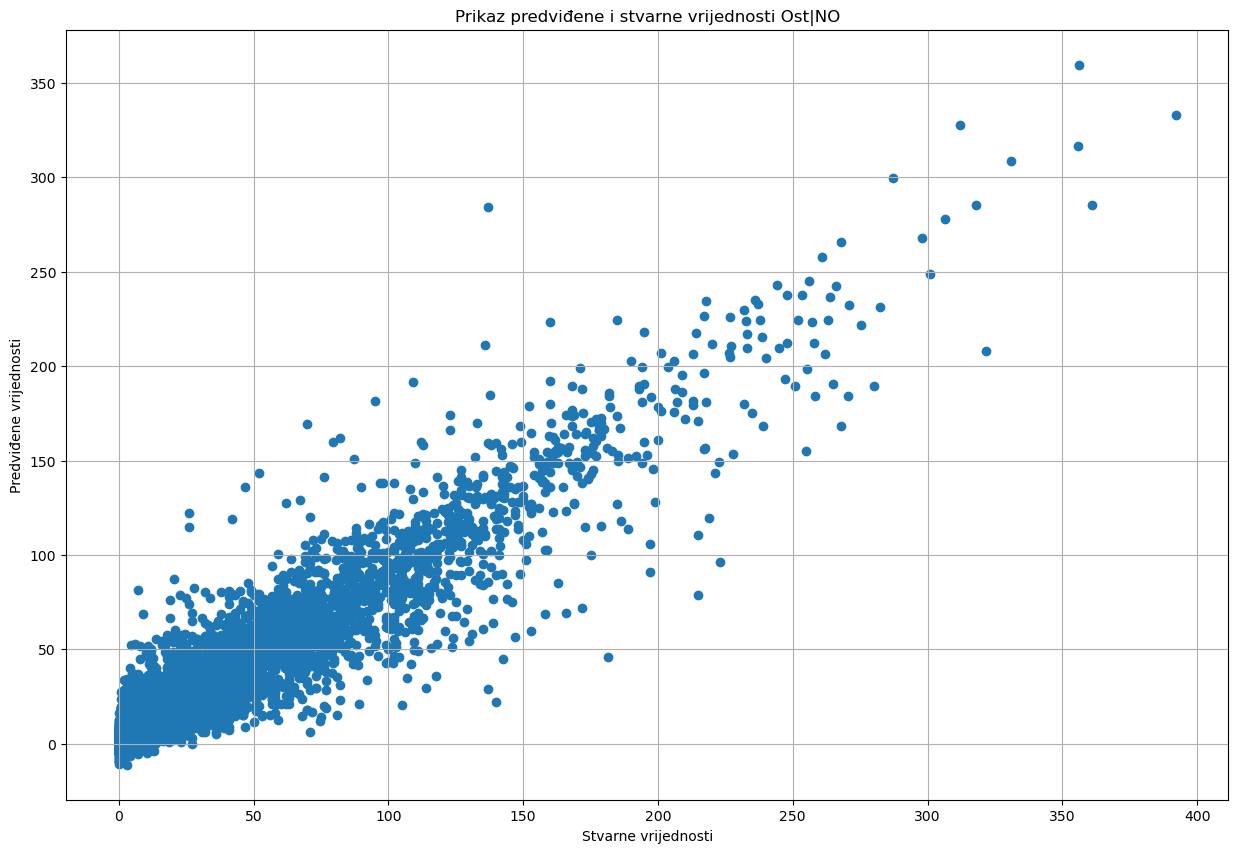

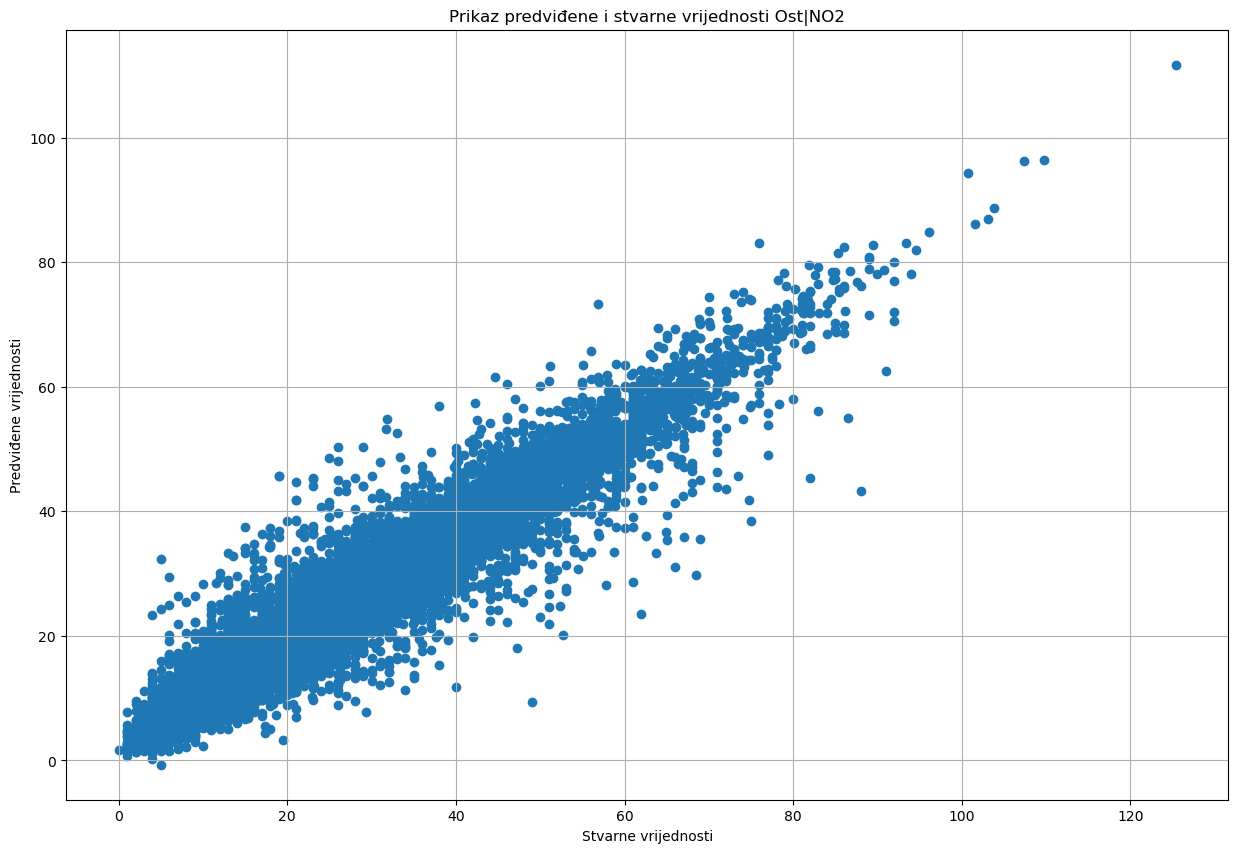

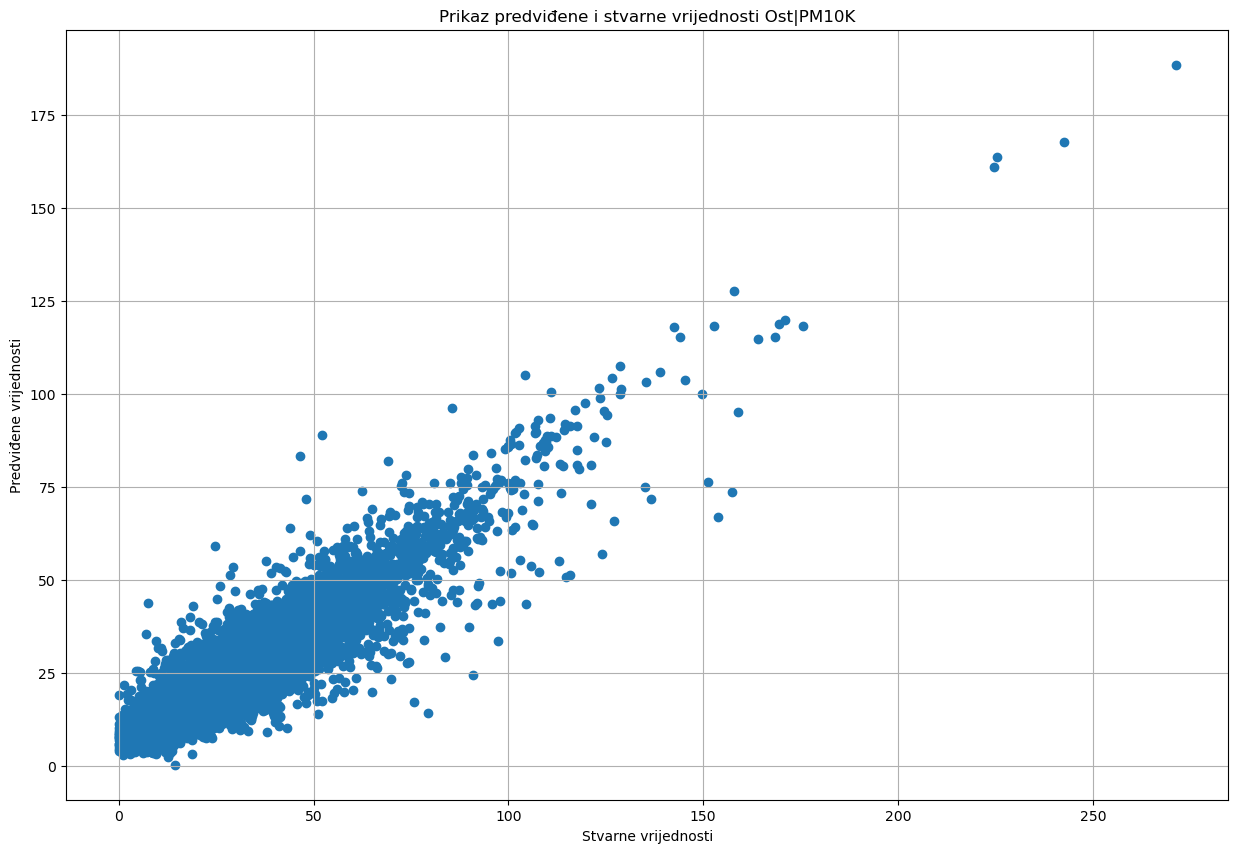

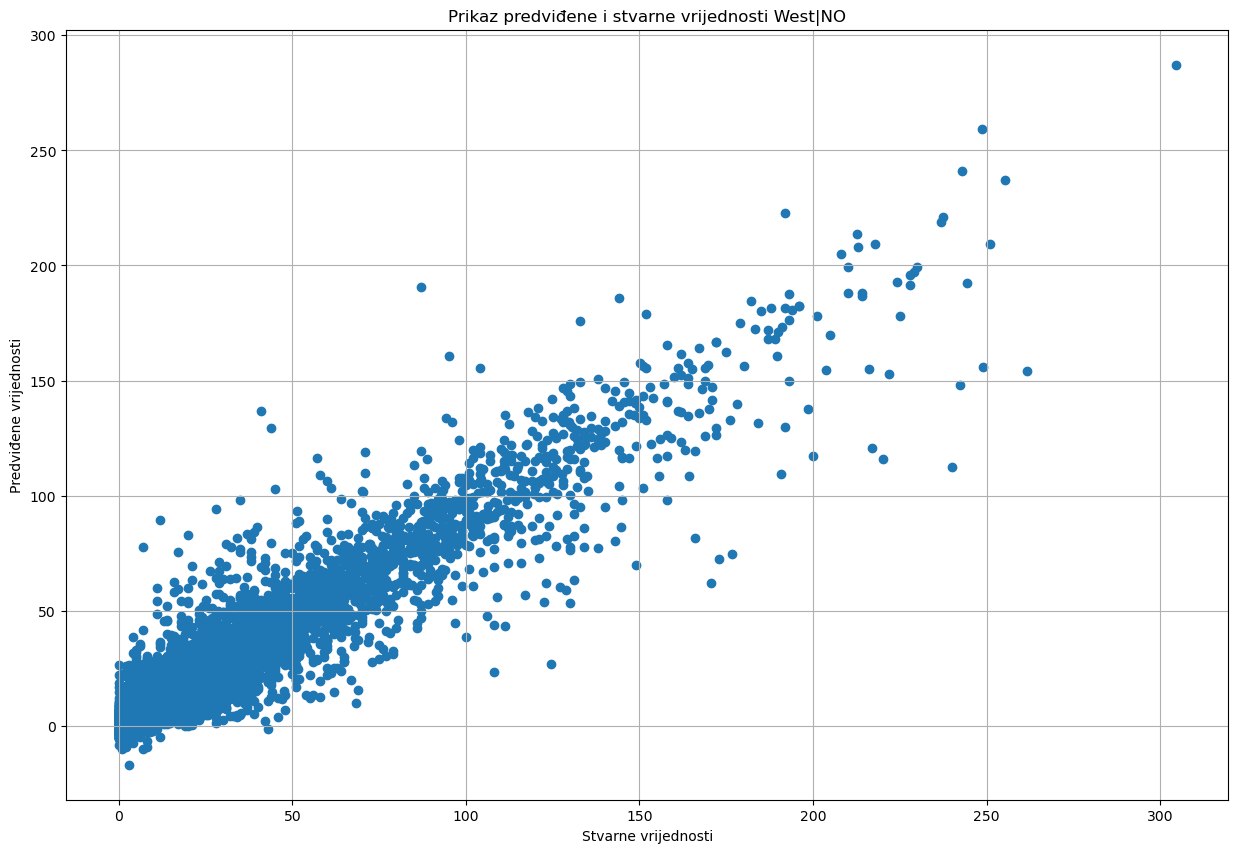

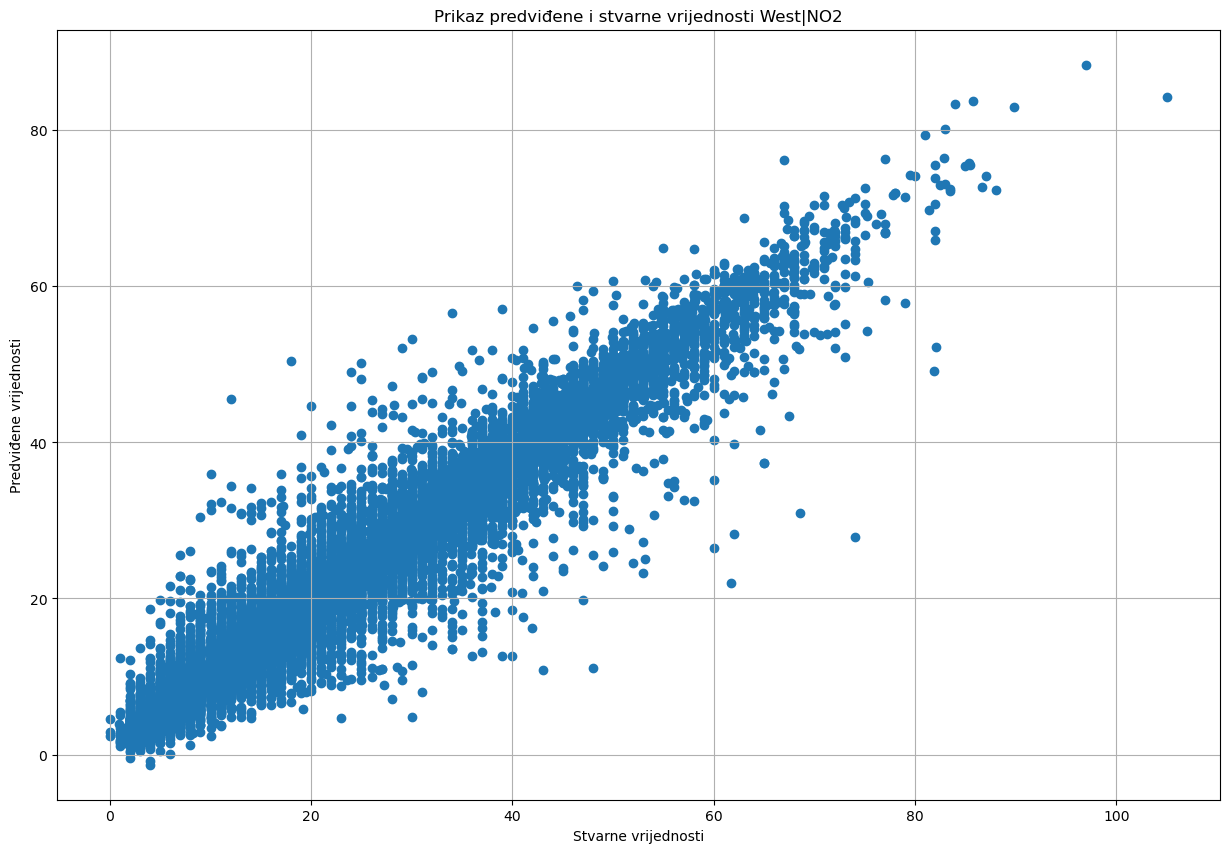

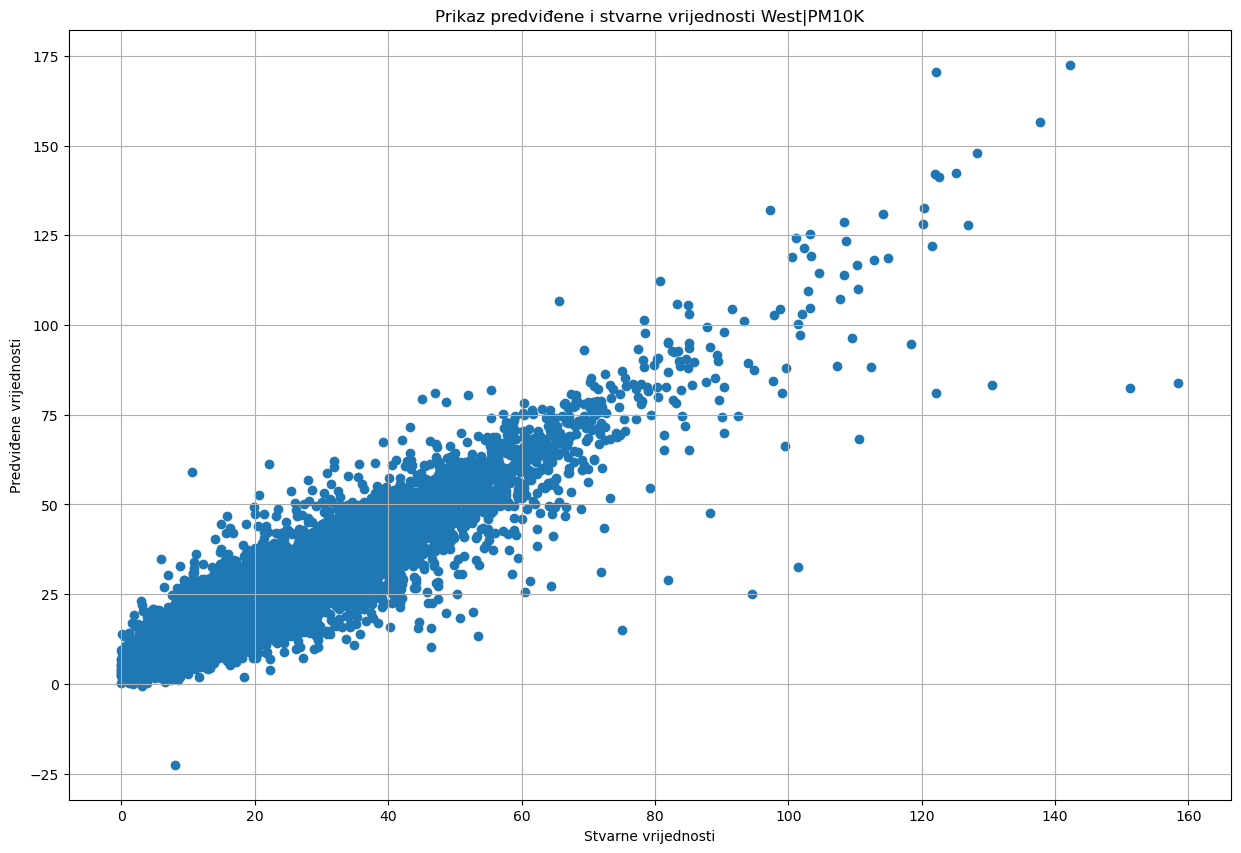

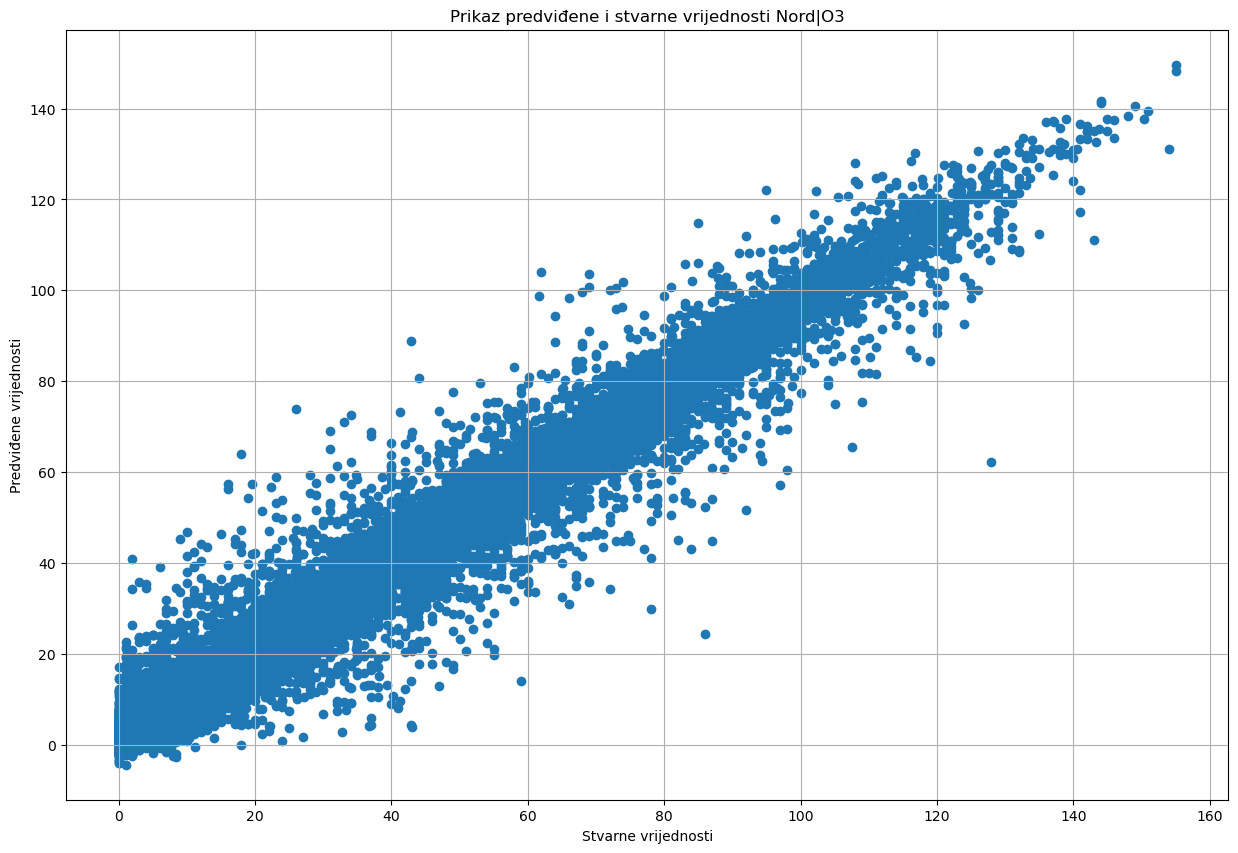

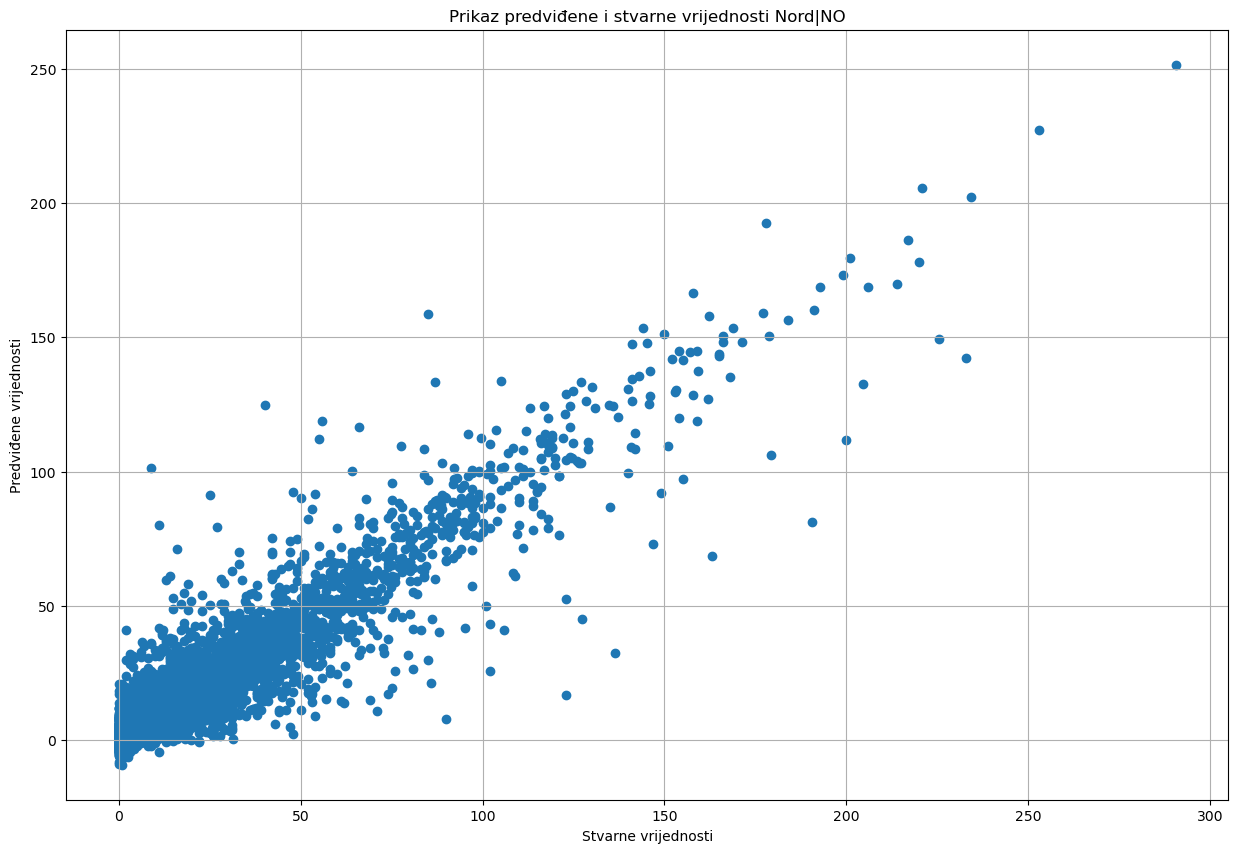

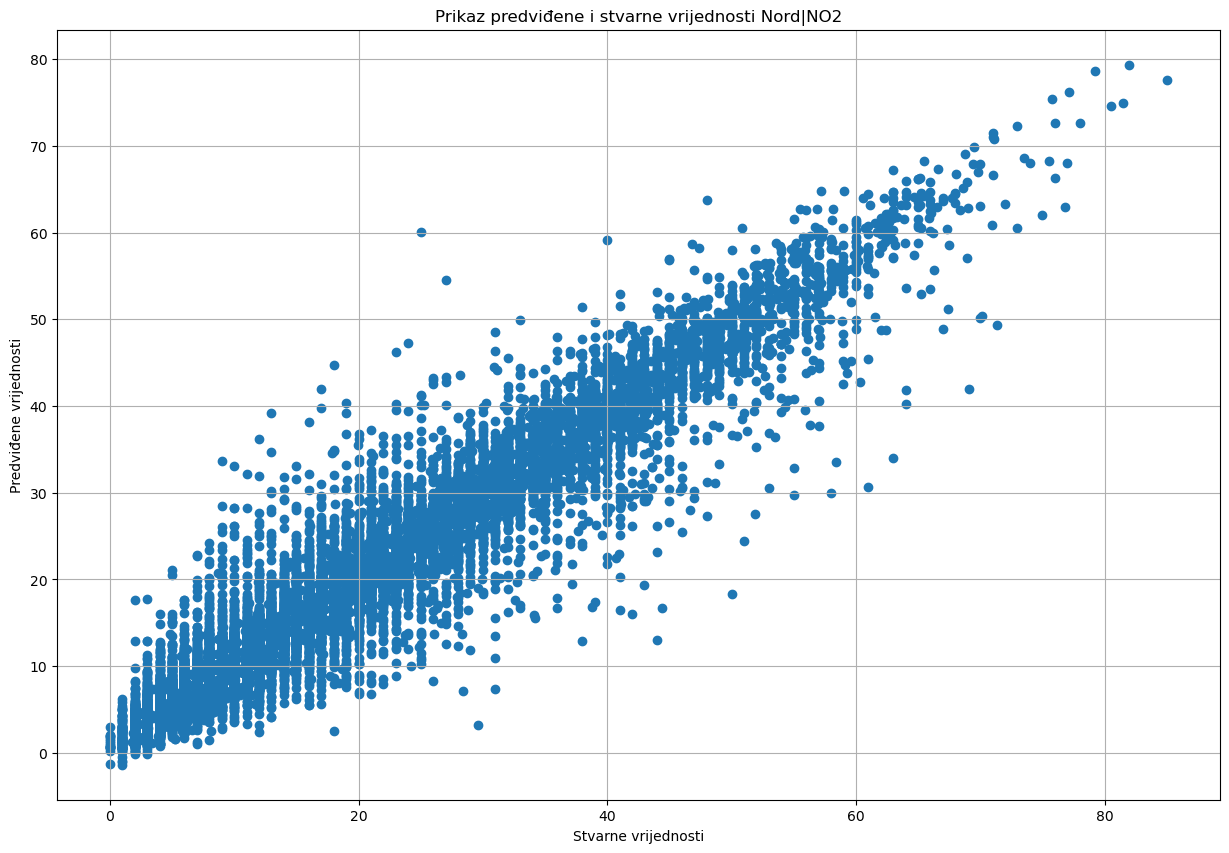

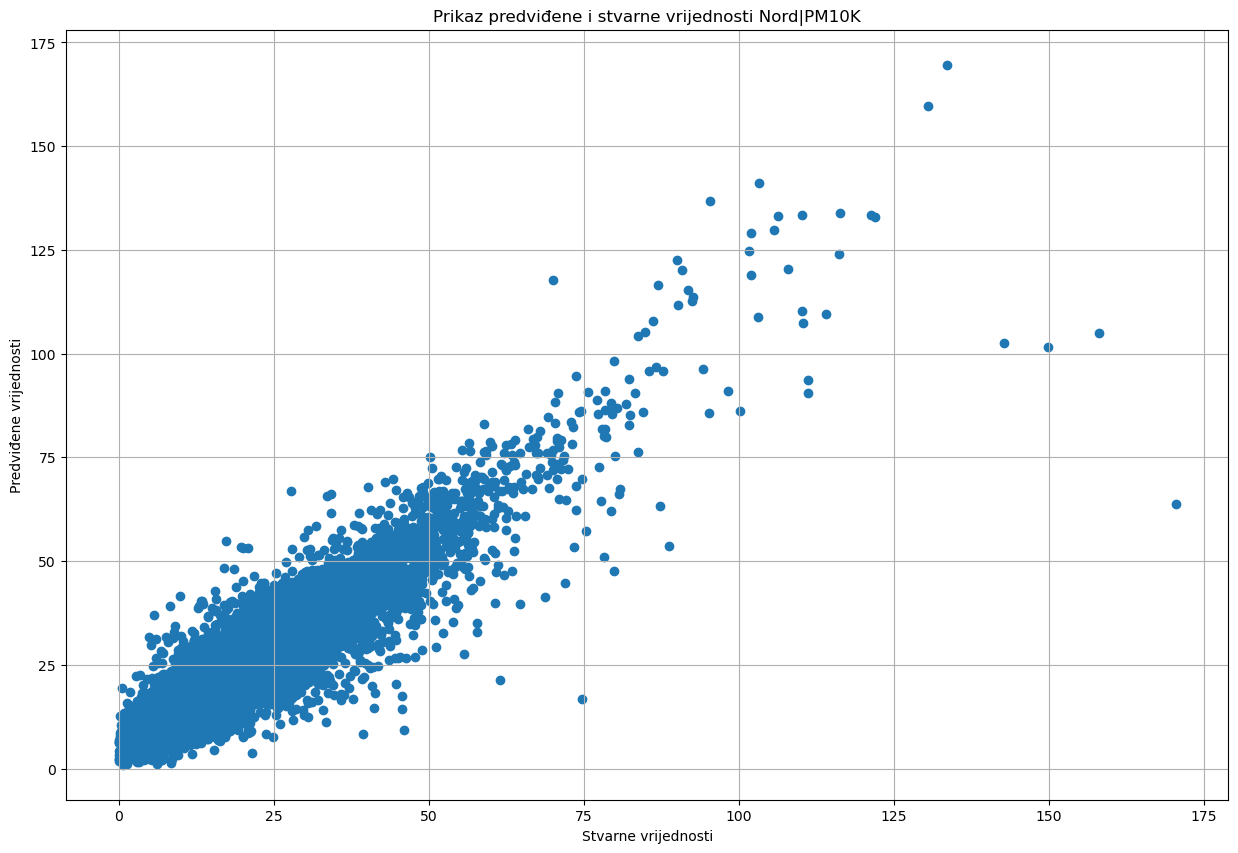

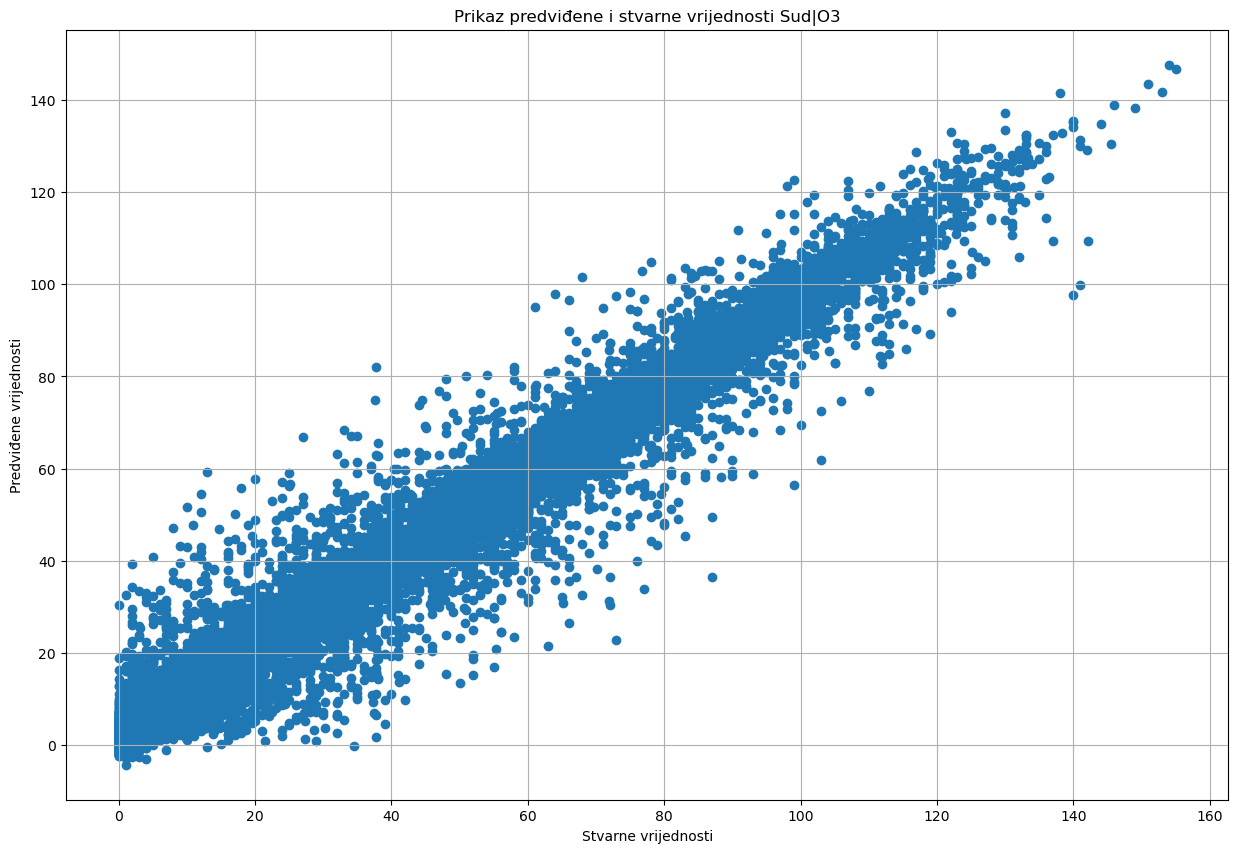

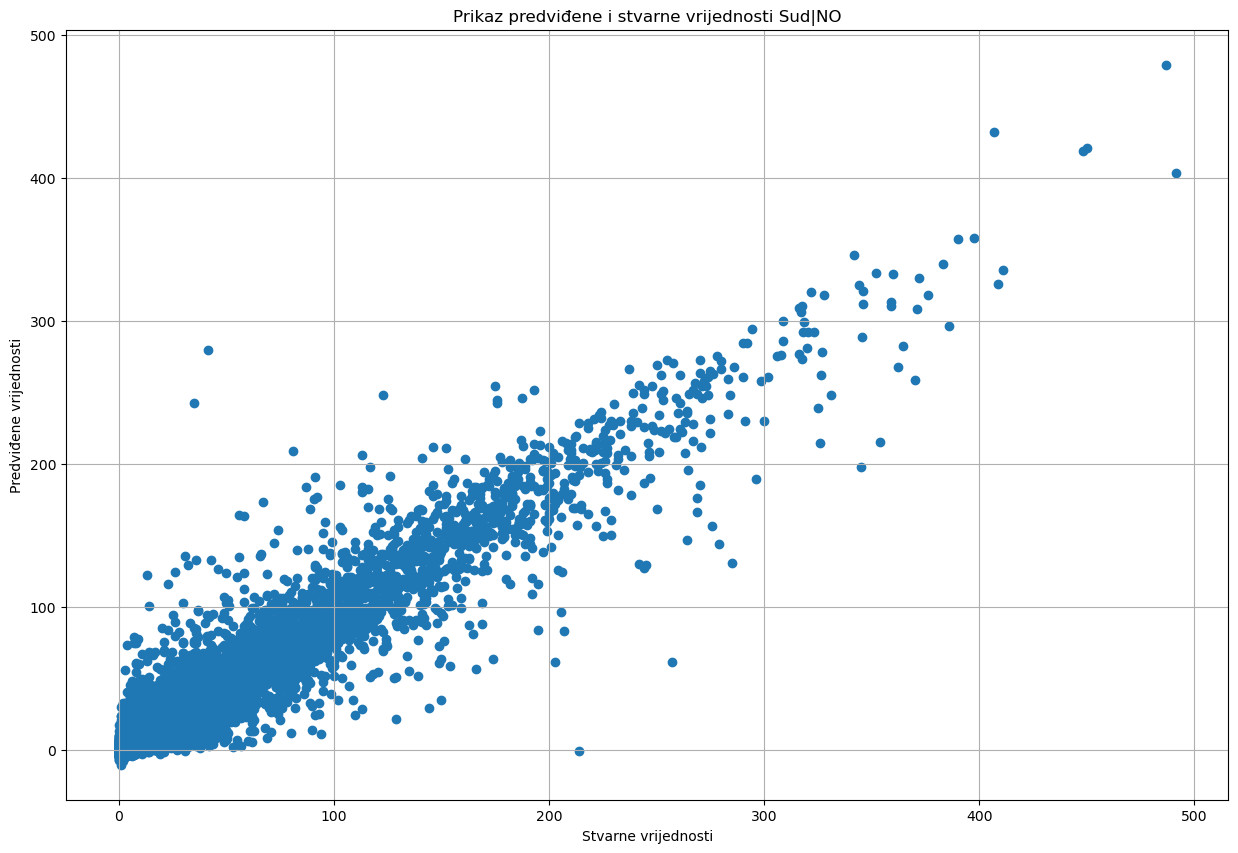

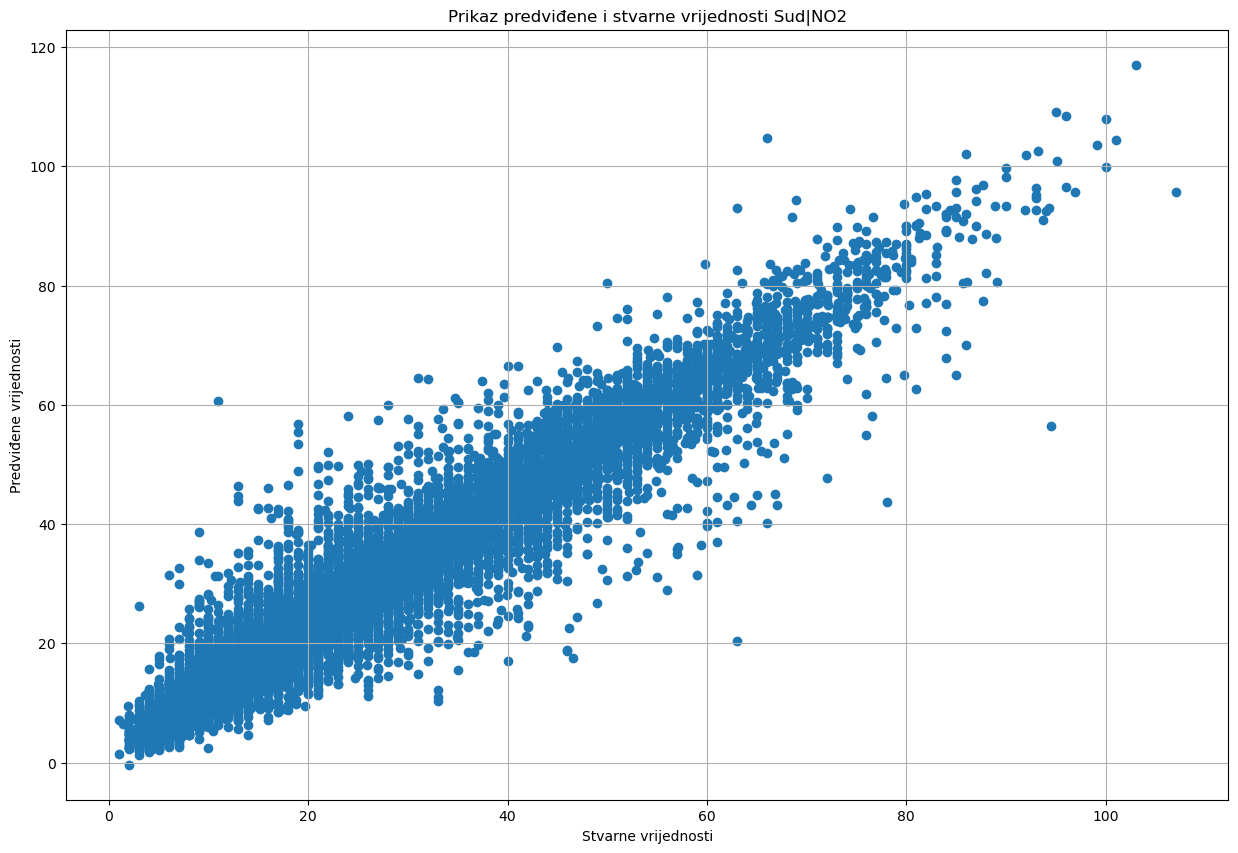

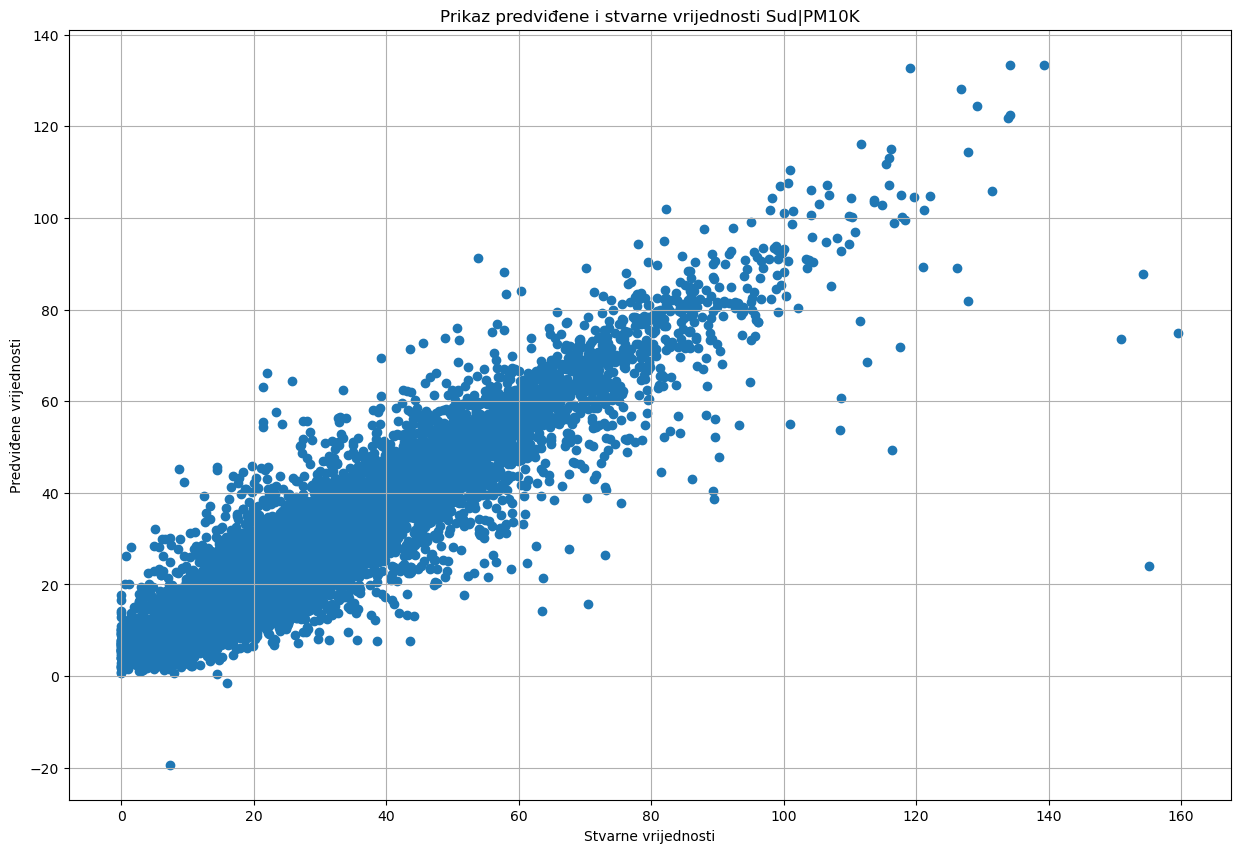

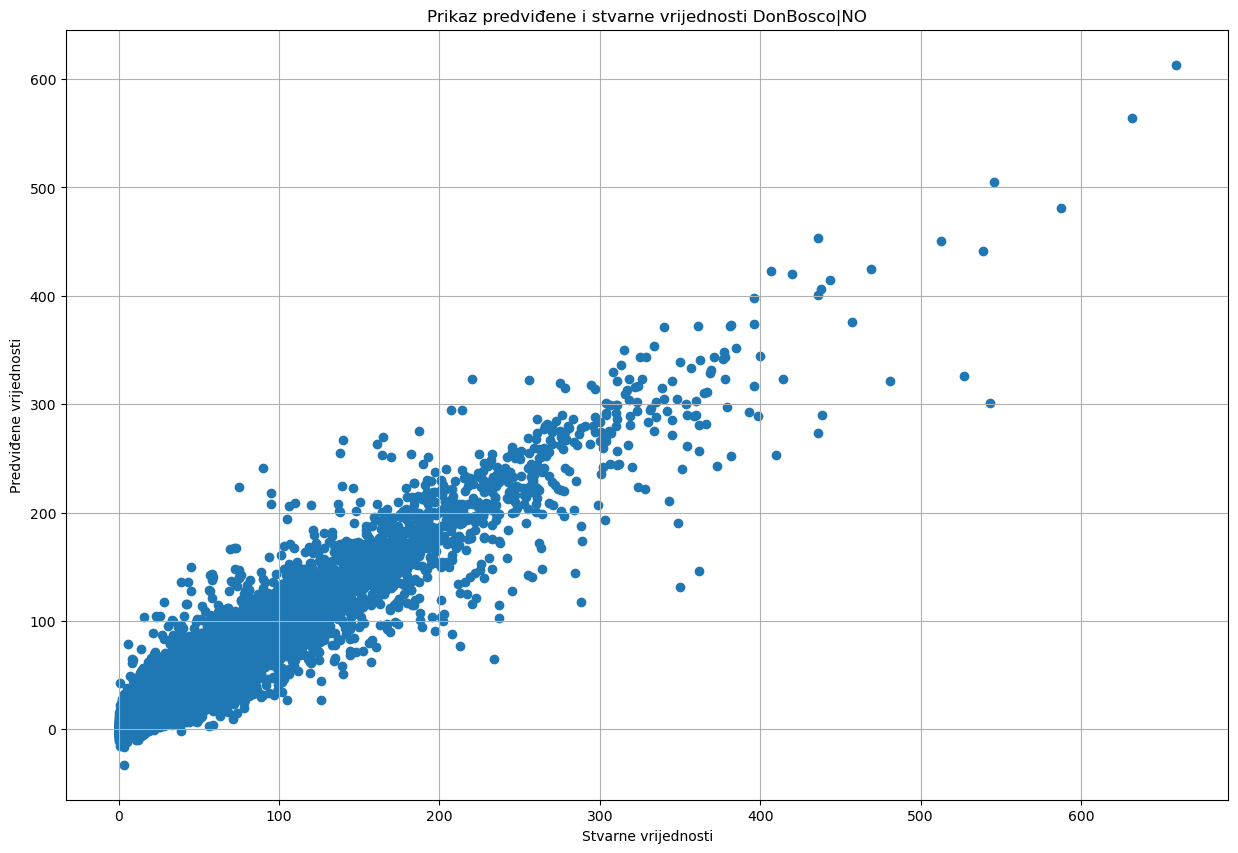

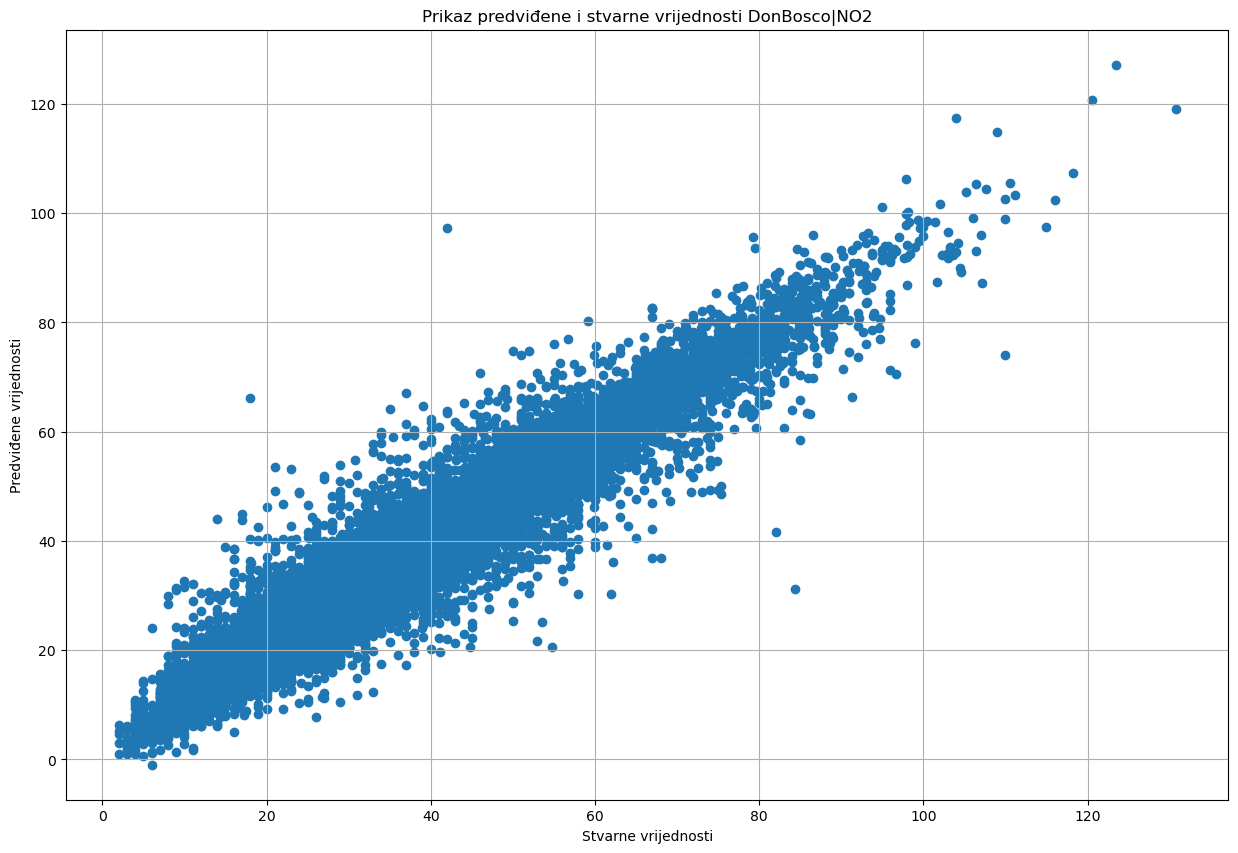

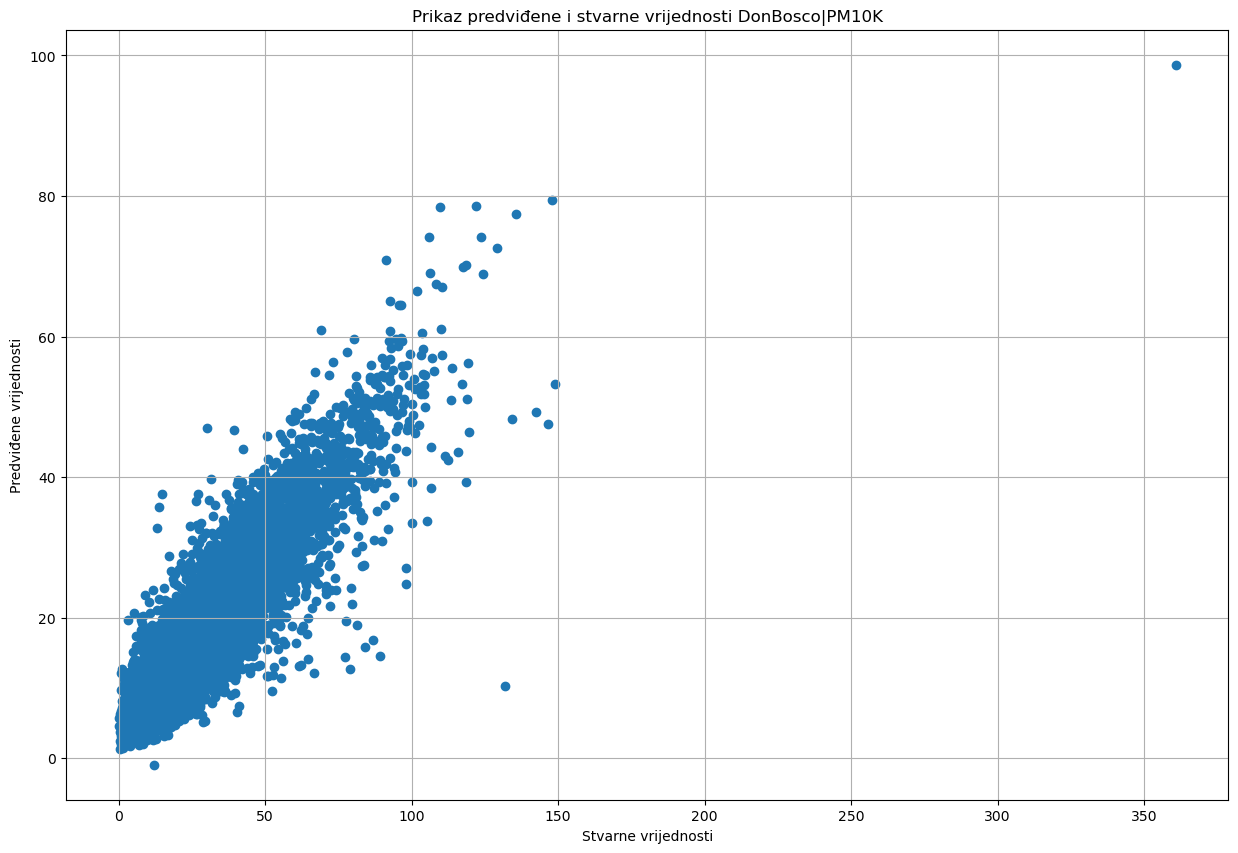

In [34]:
siteNames = []
variableNames = []
for var in outputData.columns:
    siteName, Variable = var.split('|')
    siteNames.append(siteName)
    variableNames.append(Variable)
colorMap = mcolors.LinearSegmentedColormap.from_list('rainbow', ['red', 'orange', 'yellow', 'green', 'blue'], 5)
site_name_to_color = dict(zip(np.unique(siteNames), colorMap(np.arange(len(np.unique(siteNames))))))

j=0
for var in outputData.columns:
    plt.figure(figsize=(15,10))
    plt.scatter(inverseScaled_outputData_test[:,j],inverseScaled_predicted_outputData_CNN[:,j], 
                c=[site_name_to_color[site_name] for site_name in siteNames])
    plt.xlabel("Stvarne vrijednosti")
    plt.ylabel("Predviđene vrijednosti")
    plt.title(f"Prikaz predviđene i stvarne vrijednosti {var}")
    plt.grid(True)
    plt.show()
    j+=1